# [IAPR 2020:][iapr2020] Lab 2 ‒  Object description

**Author:** Imad Eddine **MAROUF**

**Author:** Mert **ERTUGRUL**

**Author:** Arnaud **DUVIEUSART**

**Due date:** 24.04.2020

[iapr2020]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os
import cv2
import matplotlib.pyplot as plt
from scipy.stats import entropy
import scipy

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

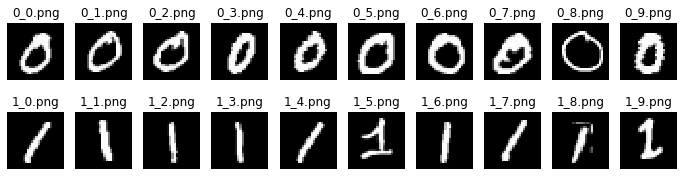

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, 'part1', '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
zeros_im = []
for im_name in zeros_names:
    zeros_im.append(skimage.io.imread('../data/lab-02-data/part1/0/' + im_name))
#a = skimage.io.imread('../data/lab-02-data/part1/0/0_0.png')
#ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
#zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, 'part1', '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ones_im = []
for im_name in ones_names:
    ones_im.append(skimage.io.imread('../data/lab-02-data/part1/1/' + im_name))
#ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
#ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors


### Preprocessing and Simple Contour Segmentation

In [3]:
from skimage.morphology import binary_erosion
from skimage.morphology import diameter_opening
import numpy as np
import cmath

Binarizes images based on a threshold value

In [4]:
def binarize(elem, threshold):
    if elem<threshold:
        return 0
    else:
        return 1
    
binarize_vec = np.vectorize(binarize)

We use morphological operations to clean the images and  to obtain a contour with thickness of one pixel. 
- The image set contains an image (1_8.png) with discontinuous bright patches, which could have been the case for a greater number of images for a different image set. In order to make sure that the algorithm for creating an "ordered" contour works correctly later on, such patches need to be removed. Therefore diameter opening is applied.

- To obtain a one-pixel-thick contour, xor operator is applied between an image and it's version that is binary-eroded by a one-pixel layer. The eroded layer is the difference between the two images and it is recovered by xor.

In [5]:
morph_zeros= []
morph_ones = []
contour_zeros = []
contour_ones = []
#removing external bright patches
for image in zeros_im:
    binary = binarize_vec(image, 128)
    morph = skimage.morphology.diameter_opening(binary, 5)
    morph_zeros.append(morph)
    contour_zeros.append( skimage.morphology.binary_erosion(morph) ^ morph )

#obtaining one-pixel-thick contours
for image in ones_im:
    binary = binarize_vec(image, 128)
    morph = skimage.morphology.diameter_opening(binary,5)
    morph_ones.append(morph)
    contour_ones.append( skimage.morphology.binary_erosion(morph) ^ morph )

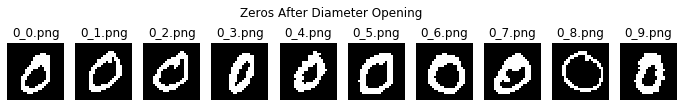

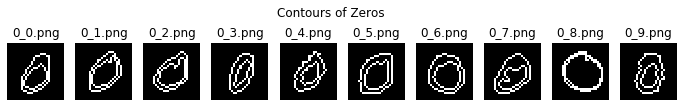

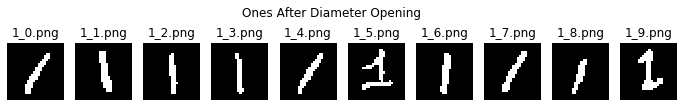

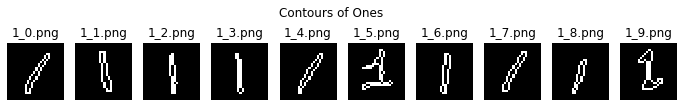

In [6]:
# Plotting resulting images and contours
fig, axes = plt.subplots(1, len(zeros_im), figsize=(12, 3))
fig.suptitle("Zeros After Diameter Opening", y=0.8)
for ax, im, nm in zip(axes, morph_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    
fig, axes = plt.subplots(1, len(zeros_im), figsize=(12, 3))
fig.suptitle("Contours of Zeros", y=0.8)
for ax, im, nm in zip(axes, contour_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    
fig, axes = plt.subplots(1, len(zeros_im), figsize=(12, 3)) 
fig.suptitle("Ones After Diameter Opening", y=0.8)
for ax, im, nm in zip(axes, morph_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    
fig, axes = plt.subplots(1, len(zeros_im), figsize=(12, 3)) 
fig.suptitle("Contours of Ones", y=0.8)
for ax, im, nm in zip(axes, contour_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### Formation of Contours with Successive Points

From the one-pixel thick contours obtained previously, we need to obtain an ordered list of pixel coordinates that can be used to find Fourier descriptors.

The algorithm for ordering a contour:
-   Starting from the upper left corner of the image, rows are traversed left-to-right until a starting pixel is found.
-   Pixels surrounding the last added pixel are searched in counterclocwise order
    - When the contour is first created, search begins with the left neighbour.
    - The starting neighbor is changed with every added contour point based on where the new point is with respect to the previous one.
- When the starting pixel of the contour is reached again, the contour is complete.

In [7]:
def get_contours(images):
    #beginnig with the left neighbor when contour is first created, 
    #changing first neighbor with every added contour point
    #starting from neighbor to the left
    
    neighbors = [(0,-1), (1,-1), (1,0), (1,1), (0,1), (-1,1), (-1,0), (-1,-1)]
    #arrow is used as the reference direction to start inspecting pixels surrounding the last verified pixel 
    #of the contour in a counterclockwise fashion. 
    arrow = 0
    contours = []
    
    for image in images:
        contour = []
        
        # finding the starting point
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                # if the uppermost layer of the contour is reached, the traversal is ended  
                if image[i,j]: 
                    last_pix = (i,j)
                    arrow = 0
                    contour.append((i,j))
                    break                       
            #to break the outer loop
            if len(contour): break
                
        # ordering the contour  
        if len(contour):
            #the contour is traversed until the starting pixel is reached
            while (contour[0] != contour[-1]) or len(contour)==1 :
                for i in range(8):
                    # the direction of the next pixel to be inspected (arrow is the starting reference)
                    direction = neighbors[ (arrow+i)%8 ]
                    new_pix = (contour[-1][0] + direction[0], contour[-1][1] + direction[1])
                    
                    #if the nex pixel is in the contour
                    if image[new_pix[0], new_pix[1]]:                    
                        contour.append((new_pix))
                        #arrow is updated such that when the neighbors of the newest will be 
                        #searched starting from a direction pointing towards unchecked pixels
                        #that cannot be internal to the contour
                        arrow = (arrow+i - 2)%8
                        break
        contours.append(contour)
    return contours

#### Testing the contour formation function:

Contours are displayed as changing color incrementally to demonstrate that they consist of successive points.

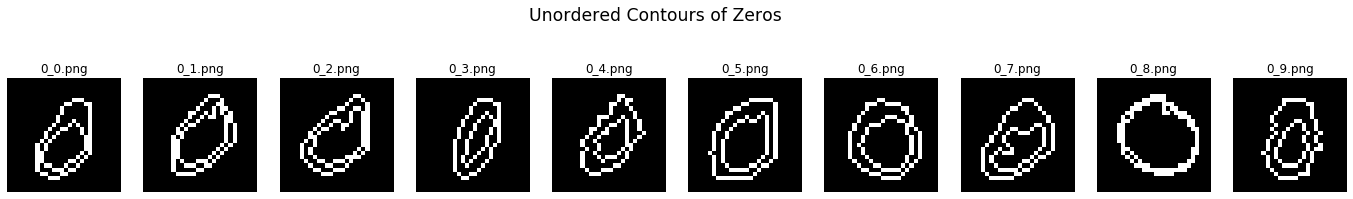

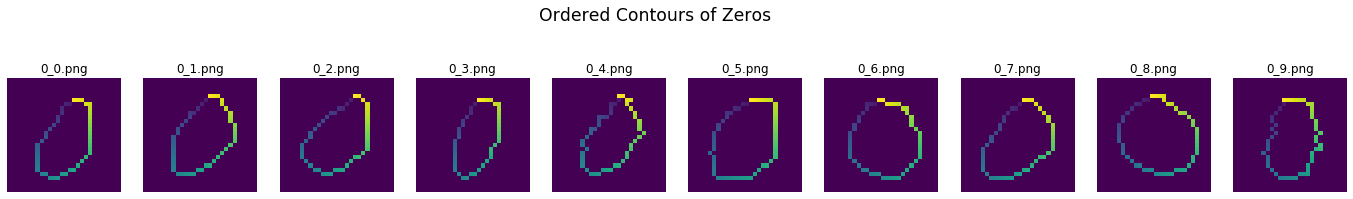

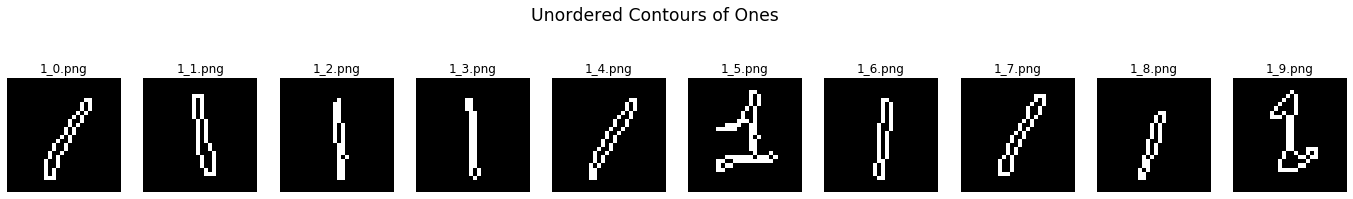

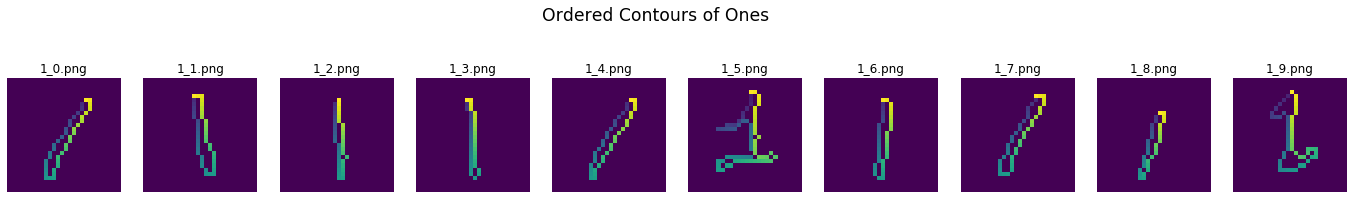

In [8]:
zero_contours = get_contours(contour_zeros)
one_contours = get_contours(contour_ones)
canvases_zeros = []
canvases_ones = []
#converting list of contour points to pixels on image with incrementally changing color
for contour in zero_contours:
    canvas = np.zeros_like(contour_zeros[0], dtype=np.uint16)
    for i in range(len(contour)):
        canvas[contour[i]]= 30 + i*10
    canvases_zeros.append(canvas)
    
for contour in one_contours:
    canvas = np.zeros_like(contour_ones[0], dtype=np.uint16)
    for i in range(len(contour)):
        canvas[contour[i]]= 50 + i*10
    canvases_ones.append(canvas)
    
#boiler plate code for displaying graphs
    
fig, axes = plt.subplots(1, len(zeros_im), figsize=(24, 6))
fig.suptitle("Unordered Contours of Zeros", y=0.8, size = 'xx-large')
for ax, im, nm in zip(axes, contour_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    
fig, axes = plt.subplots(1, len(zeros_im), figsize=(24, 6))
fig.suptitle("Ordered Contours of Zeros", y=0.8, size = 'xx-large')    
for ax, im, nm in zip(axes, canvases_zeros, zeros_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
    
fig, axes = plt.subplots(1, len(zeros_im), figsize=(24, 6))
fig.suptitle("Unordered Contours of Ones", y=0.8, size = 'xx-large')
for ax, im, nm in zip(axes, contour_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    
fig, axes = plt.subplots(1, len(zeros_im), figsize=(24, 6))
fig.suptitle("Ordered Contours of Ones", y=0.8, size = 'xx-large')
for ax, im, nm in zip(axes, canvases_ones, ones_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)


### Fourier Description Function

Produces the requested fourier descriptors

In [13]:
def fourier_description(contours, coefficients):
    """
    Contours: a list of contour images or a single contour image
    Coefficients: list of the Fourier descriptors requested
    """
    L = len(coefficients)
    conts = len(contours)
    descriptors = np.zeros((L,conts),dtype=complex )
    
    for l in range(L):
        for c in range(conts):
            for k in range(len(contours[c])):
                descriptors[l,c] += complex(contours[c][k][0],contours[c][k][1]) *\
                                        cmath.exp(-1j*2.0*cmath.pi*k*coefficients[l]/len(contours[c]) )
                
            descriptors[l,c] = abs(descriptors[l,c])
    
    return descriptors
          

Alternatively, the pre-existing fft function in numpy can be used:
(The results for the two implementations will be compared)

In [14]:
def fft_based(contours, coefficients):
    L = len(coefficients)
    conts = len(contours)
    descriptors = np.zeros((L,conts), dtype=complex )
    
    for c in range(conts):
            first_tuple_elements = [atuple[0] for atuple in contours[c]]
            sec_tuple_elements = [1j*atuple[1] for atuple in contours[c]]   
            complex_array = first_tuple_elements + sec_tuple_elements
            fft = np.fft.fft(complex_array)
            for l in range(L):
                descriptors[l,c]= fft[coefficients[l]]  
                descriptors[l,c] = abs(descriptors[l,c])
    return descriptors

Obtaining and displaying the fourier descriptors

/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False

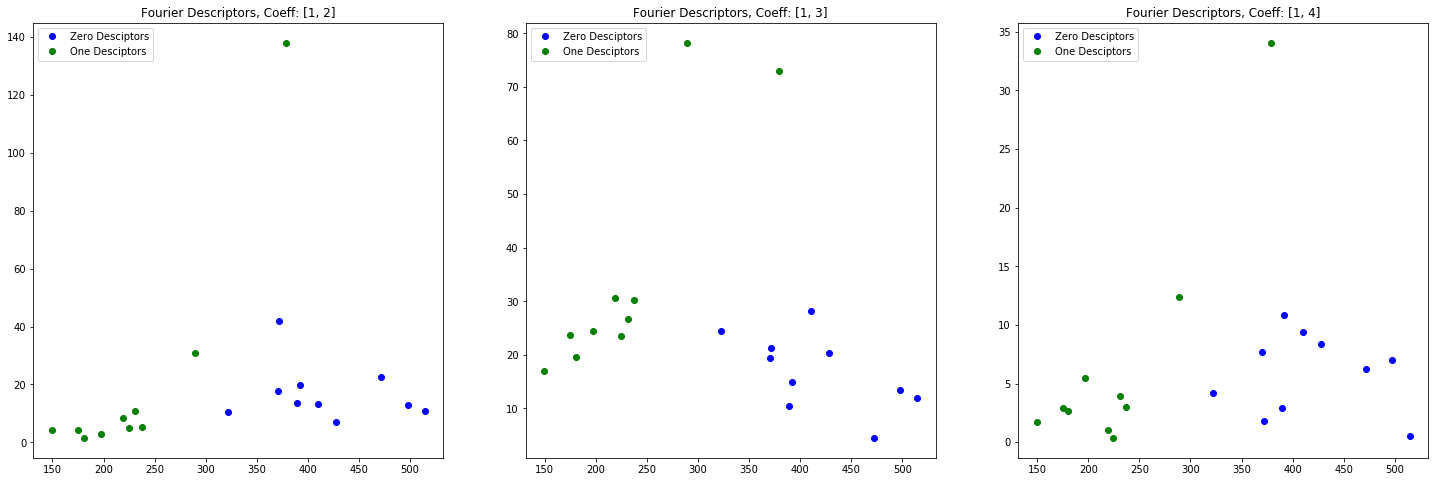

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(25, 8))

descriptors_zero  = fourier_description(zero_contours, [1, 2])
descriptors_one   = fourier_description(one_contours, [1, 2])

descriptors_zero1 = fourier_description(zero_contours, [1, 3])
descriptors_one1  = fourier_description(one_contours, [1, 3])

descriptors_zero2 = fourier_description(zero_contours, [1, 4])
descriptors_one2  = fourier_description(one_contours, [1, 4])

ax[0].plot(descriptors_zero[0], descriptors_zero[1],'bo', label="Zero Desciptors")
ax[0].plot(descriptors_one[0], descriptors_one[1], 'go', label="One Desciptors")
ax[0].set_title("Fourier Descriptors, Coeff: [1, 2]")
ax[0].legend(loc='upper left', frameon=True)

ax[1].plot(descriptors_zero1[0], descriptors_zero1[1],'bo', label="Zero Desciptors")
ax[1].plot(descriptors_one1[0], descriptors_one1[1], 'go', label="One Desciptors")
ax[1].set_title("Fourier Descriptors, Coeff: [1, 3]")
ax[1].legend(loc='upper left', frameon=True)

ax[2].plot(descriptors_zero2[0], descriptors_zero2[1],'bo', label="Zero Desciptors")
ax[2].plot(descriptors_one2[0], descriptors_one2[1], 'go', label="One Desciptors")
ax[2].set_title("Fourier Descriptors, Coeff: [1, 4]")
ax[2].legend(loc='upper left', frameon=True)

plt.show()

In the plots of all three combinations of descriptors ( [1,2] , [1,3] , [1,4] ), clusters of ones and zeros appear to be seperable by a line. However, in every combination, at least one or two outliers exist. 
Specifically among ones, the two data points that appear to be far off from the cluster in every graph are most likely 1_5 and 1_9, as in both pictures the style of the character is considerably different than the rest.

Among the zeros, the main cluster appears less dense than the cluster of ones but does not have outliers that are drastically far off.

0th descriptor is never used, as it is the "DC-component" and not using it ensures location-invariance.
Ohter invariences will be added later.

-------------------------------------

 Implementation with the function "fft_based"

/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False

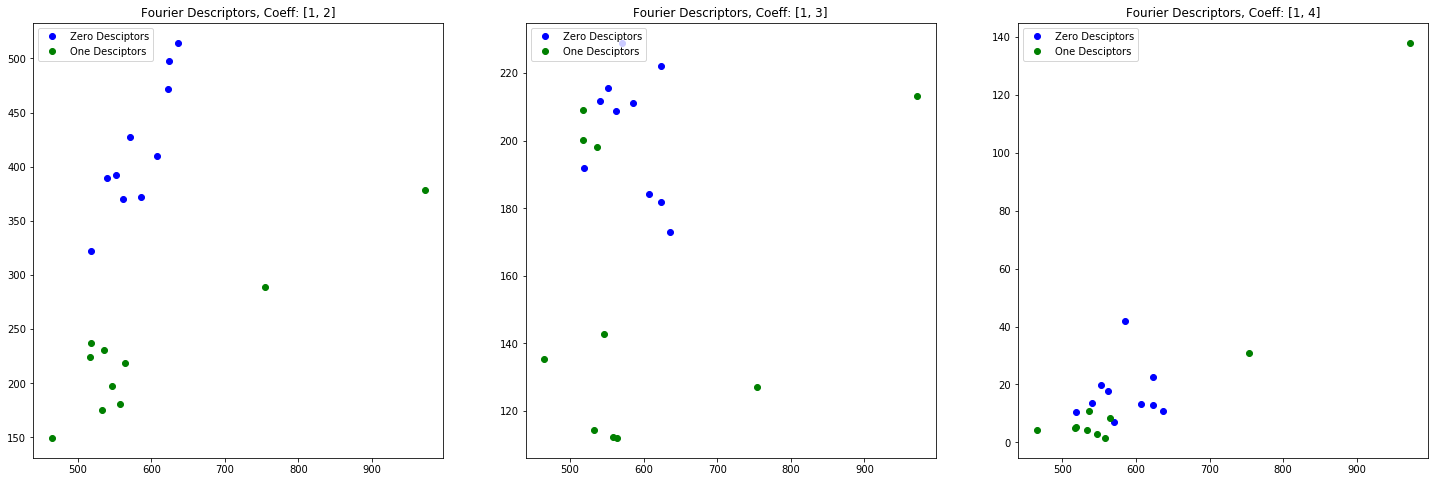

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(25, 8))

descriptors_zero  = fft_based(zero_contours, [1, 2])
descriptors_one   = fft_based(one_contours, [1, 2])

descriptors_zero1 = fft_based(zero_contours, [1, 3])
descriptors_one1  = fft_based(one_contours, [1, 3])

descriptors_zero2 = fft_based(zero_contours, [1, 4])
descriptors_one2  = fft_based(one_contours, [1, 4])

ax[0].plot(descriptors_zero[0], descriptors_zero[1],'bo', label="Zero Desciptors")
ax[0].plot(descriptors_one[0], descriptors_one[1], 'go', label="One Desciptors")
ax[0].set_title("Fourier Descriptors, Coeff: [1, 2]")
ax[0].legend(loc='upper left', frameon=True)

ax[1].plot(descriptors_zero1[0], descriptors_zero1[1],'bo', label="Zero Desciptors")
ax[1].plot(descriptors_one1[0], descriptors_one1[1], 'go', label="One Desciptors")
ax[1].set_title("Fourier Descriptors, Coeff: [1, 3]")
ax[1].legend(loc='upper left', frameon=True)

ax[2].plot(descriptors_zero2[0], descriptors_zero2[1],'bo', label="Zero Desciptors")
ax[2].plot(descriptors_one2[0], descriptors_one2[1], 'go', label="One Desciptors")
ax[2].set_title("Fourier Descriptors, Coeff: [1, 4]")
ax[2].legend(loc='upper left', frameon=True)

plt.show()

plt.show()

- The results for the fft based implementation appear to have their axes inverted.
- Other than the results for coefficients [1,2], the results are nowhere near those obtained with our own fourier implementation. No seperable cluster formation is present in [1,3] or [1,4]

We could not determine why the fft implementation produced such different results. It was expected to be not exactly the same as our fourier implementation but not as far off as this. It could be due to an unnoticed mistake in the function code for "fft-based"

## Adding scaling invariance

In order to add scaling invariance, the fourier descriptors must be scaled by another descriptor.

/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


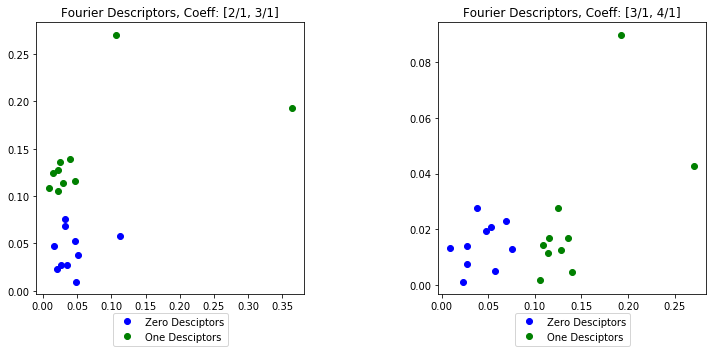

In [17]:
descriptors_zero23 = fourier_description(zero_contours, [2,3,1])
descriptors_one23= fourier_description(one_contours, [2,3,1])

descriptors_zero34 = fourier_description(zero_contours, [3,4,1])
descriptors_one34= fourier_description(one_contours, [3,4,1])

scaled_descriptors_zero23 = np.divide(descriptors_zero23[0:2], descriptors_zero23[2])
scaled_descriptors_one23 = np.divide(descriptors_one23[0:2], descriptors_one23[2])

scaled_descriptors_zero34 = np.divide(descriptors_zero34[0:2], descriptors_zero34[2])
scaled_descriptors_one34 = np.divide(descriptors_one34[0:2], descriptors_one34[2])

plt.figure(figsize=(12, 5)).subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
plt.plot(scaled_descriptors_zero23[0], scaled_descriptors_zero23[1], 'bo', label="Zero Desciptors")
plt.plot(scaled_descriptors_one23[0], scaled_descriptors_one23[1], 'go', label="One Desciptors")
plt.title("Fourier Descriptors, Coeff: [2/1, 3/1]")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))

plt.subplot(1, 2, 2)
plt.plot(scaled_descriptors_zero34[0], scaled_descriptors_zero34[1], 'bo', label="Zero Desciptors")
plt.plot(scaled_descriptors_one34[0], scaled_descriptors_one34[1], 'go', label="One Desciptors")
plt.title("Fourier Descriptors, Coeff: [3/1, 4/1]")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))

plt.show()


The results for the original image set are are similar to those without the invariance as the characters in the given images are of similar sizes.

------------------------------------------------------------------------------------------------------------------
## Testing Rotation Invarince
Since we use the absolute values of the Fourier descriptors, rotation invariance is already present. Rotation of the contour is simply a phase shift, which does not factor into the absolute value. In order to demonstrate this, the images are rotated by random degrees and their fourier descriptors are displayed again.

In [18]:
import random

In [20]:
def rotate_img(img, deg = 90):
    """
    Arguments:  img: np.array
                deg: int
    output: np.array
    """
    
    # Get center of image
    center = img.shape
    center = (center[0] / 2, center[1] / 2)
    
    return cv2.warpAffine(img, cv2.getRotationMatrix2D(center, deg, 1.0), img.shape)

Images are rotated randomly

In [21]:
# Rotation
rotated_zeros_im = []
for img in zeros_im:
    #rotating images randomly by a multiple of 20 degrees 
    rotated_zeros_im.append(rotate_img(img,20*random.randint(1,17)))
    
rotated_ones_im = []  
for img in ones_im:
    rotated_ones_im.append(rotate_img(img,20*random.randint(1,17)))

In [22]:
# Contours and Morphs after rotating
morph_zeros_rot= []
morph_ones_rot = []
contour_zeros_rot = []
contour_ones_rot = []

for image in rotated_zeros_im:
    binary = binarize_vec(image, 128)
    morph = skimage.morphology.diameter_opening(binary, 5)
    morph_zeros_rot.append(morph)
    contour_zeros_rot.append( skimage.morphology.binary_erosion(morph) ^ morph )

for image in rotated_ones_im:
    binary = binarize_vec(image, 128)
    morph = skimage.morphology.diameter_opening(binary,5)
    morph_ones_rot.append(morph)
    contour_ones_rot.append( skimage.morphology.binary_erosion(morph) ^ morph )

In [23]:
zero_contours_rot = get_contours(contour_zeros_rot)
one_contours_rot = get_contours(contour_ones_rot)

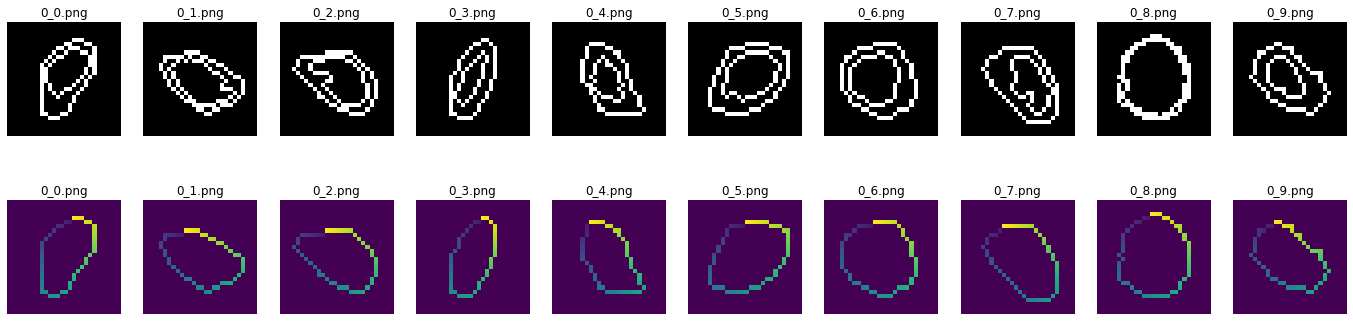

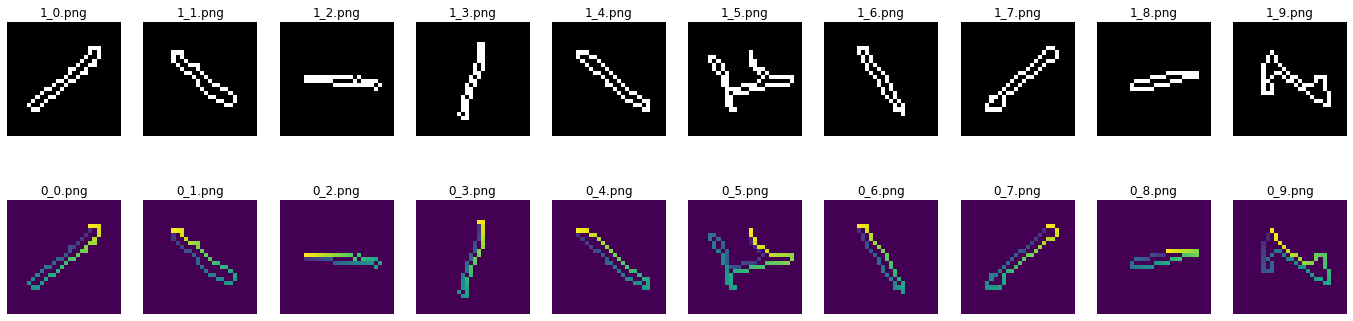

In [24]:
canvases_zeros_rot = []
canvases_ones_rot = []
for contour in zero_contours_rot:
    canvas = np.zeros_like(contour_zeros[0], dtype=np.uint16)
    for i in range(len(contour)):
        canvas[contour[i]]= 30 + i*10
    canvases_zeros_rot.append(canvas)
    
for contour in one_contours_rot:
    canvas = np.zeros_like(contour_ones[0], dtype=np.uint16)
    for i in range(len(contour)):
        canvas[contour[i]]= 50 + i*10
    canvases_ones_rot.append(canvas)
    
fig, axes = plt.subplots(2, len(zeros_im), figsize=(24, 6))
for ax, im, nm in zip(axes[0], contour_zeros_rot, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], canvases_zeros_rot, zeros_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
    
fig, axes = plt.subplots(2, len(ones_im), figsize=(24, 6))
for ax, im, nm in zip(axes[0], contour_ones_rot, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], canvases_ones_rot, zeros_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)

/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False

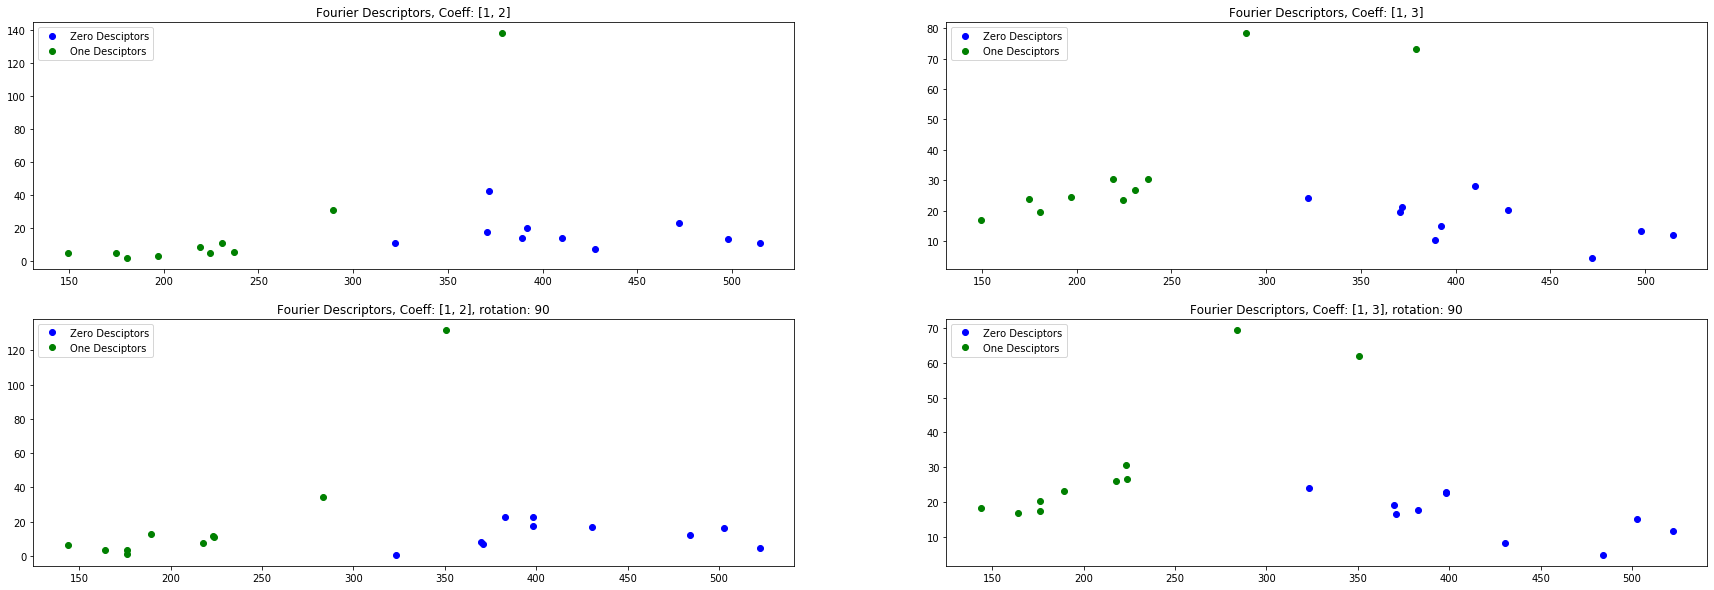

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(30, 10))
#Original
descriptors_zero  = fourier_description(zero_contours, [1, 2])
descriptors_one   = fourier_description(one_contours, [1, 2])

descriptors_zero1 = fourier_description(zero_contours, [1, 3])
descriptors_one1  = fourier_description(one_contours, [1, 3])

descriptors_zero2 = fourier_description(zero_contours, [1, 4])
descriptors_one2  = fourier_description(one_contours, [1, 4])
#---------------------------------------------------------------------------------------#
ax[0][0].plot(descriptors_zero[0], descriptors_zero[1],'bo', label="Zero Desciptors")
ax[0][0].plot(descriptors_one[0], descriptors_one[1], 'go', label="One Desciptors")
ax[0][0].set_title("Fourier Descriptors, Coeff: [1, 2]")
ax[0][0].legend(loc='upper left', frameon=True)

ax[0][1].plot(descriptors_zero1[0], descriptors_zero1[1],'bo', label="Zero Desciptors")
ax[0][1].plot(descriptors_one1[0], descriptors_one1[1], 'go', label="One Desciptors")
ax[0][1].set_title("Fourier Descriptors, Coeff: [1, 3]")
ax[0][1].legend(loc='upper left', frameon=True)
#---------------------------------------------------------------------------------------#
#Rotated
descriptors_zero_rot  = fourier_description(zero_contours_rot, [1, 2])
descriptors_one_rot   = fourier_description(one_contours_rot, [1, 2])

descriptors_zero1_rot = fourier_description(zero_contours_rot, [1, 3])
descriptors_one1_rot  = fourier_description(one_contours_rot, [1, 3])

descriptors_zero2_rot = fourier_description(zero_contours_rot, [1, 4])
descriptors_one2_rot  = fourier_description(one_contours_rot, [1, 4])

ax[1][0].plot(descriptors_zero_rot[0], descriptors_zero_rot[1],'bo', label="Zero Desciptors")
ax[1][0].plot(descriptors_one_rot[0], descriptors_one_rot[1], 'go', label="One Desciptors")
ax[1][0].set_title("Fourier Descriptors, Coeff: [1, 2], rotation: 90")
ax[1][0].legend(loc='upper left', frameon=True)

ax[1][1].plot(descriptors_zero1_rot[0], descriptors_zero1_rot[1],'bo', label="Zero Desciptors")
ax[1][1].plot(descriptors_one1_rot[0], descriptors_one1_rot[1], 'go', label="One Desciptors")
ax[1][1].set_title("Fourier Descriptors, Coeff: [1, 3], rotation: 90")
ax[1][1].legend(loc='upper left', frameon=True)
#---------------------------------------------------------------------------------------#

plt.show()

The shapes of the clusters and approximate locations of the data points seem to be in tact, although not exactly the same as they were for the previous results.

Since rotation invariance is obtained simply by using absolute values, there was no complex procedure applied that could be faulty. 

Therefore, we assume this result to be the maximal rotation invariance we can obtain with the given contour finding and fourier description functions.

------------------------------------------------------------------------------------------------------------------

### Contours with Skeletonization
It must be noted that the contour formation function implemented in this section results in each point of the skeletons of the images of "1" being added to the contour twice. Therefore instead of becoming an open ended contour, each skeleton becomes a closed contour with an internal area of zero, as the "1" skeletons do not enclose any area. 

In [26]:
from skimage.morphology import skeletonize, binary_dilation

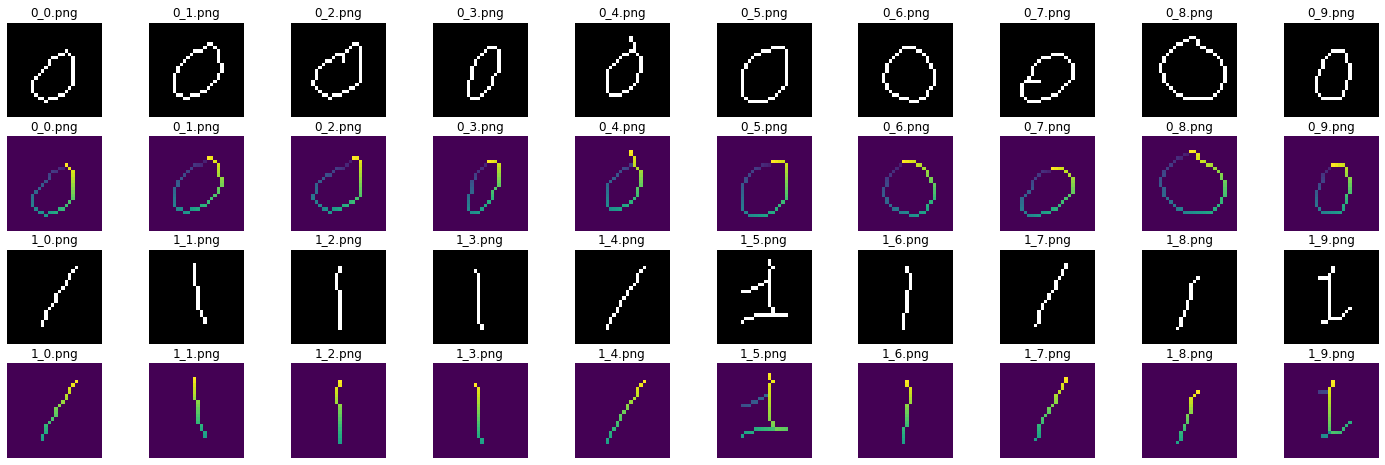

In [27]:
skeleton_zeros = []
skeleton_ones = []

for image in zeros_im:
    binary = image > 128
    morph = skimage.morphology.diameter_opening(binary,5)
    skeleton = skeletonize(morph)
    skeleton_zeros.append(skeleton)

for image in ones_im:
    binary = image > 128
    morph = skimage.morphology.diameter_opening(binary,5)
    skeleton = skeletonize(morph)
    skeleton_ones.append(skeleton)
    
 # obtaining contours with successive points:
sk_zero_contours = get_contours(skeleton_zeros)
sk_one_contours = get_contours(skeleton_ones)
sk_canvases_zeros = []
sk_canvases_ones = []

for contour in sk_zero_contours:
    canvas = np.zeros_like(skeleton_zeros[0], dtype=np.uint16)
    for i in range(len(contour)):
        canvas[contour[i]]= 30 + i*10
    sk_canvases_zeros.append(canvas)
    
for contour in sk_one_contours:
    canvas = np.zeros_like(skeleton_ones[0], dtype=np.uint16)
    for i in range(len(contour)):
        canvas[contour[i]]= 50 + i*10
    sk_canvases_ones.append(canvas)
    
    
    
# Plot skeletons and the resulting contours with successive points
fig, axes = plt.subplots(4, len(zeros_im), figsize=(25, 8))
for ax, im, nm in zip(axes[0], skeleton_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], sk_canvases_zeros, zeros_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], skeleton_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], sk_canvases_ones, ones_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
    

/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


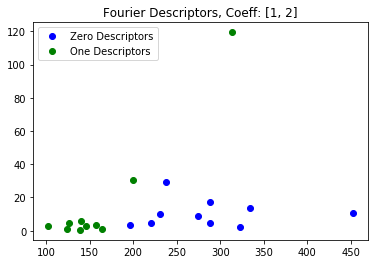

In [28]:
descriptors_zero = fourier_description(sk_zero_contours, [1,2])
descriptors_one= fourier_description(sk_one_contours, [1,2])

plt.plot(descriptors_zero[0],descriptors_zero[1], 'bo', label = "Zero Descriptors")
plt.plot(descriptors_one[0],descriptors_one[1], 'go', label = "One Descriptors")
plt.title("Fourier Descriptors, Coeff: [1, 2]")
plt.legend(loc='upper left', frameon=True)

plt.show()

The results obtained for skeleotization are not better than those for the contours formed with xor operation. The clusters appear less seperated and the ones cluster is once again more dense than the ones cluster but has outliers. The same outliers are present.

### 1.3 Additional method(s)

#### Imports

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.linalg import eigh
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import LocallyLinearEmbedding


In [30]:
def PCA_(data): 
    pca = decomposition.PCA()
    pca.n_components = 2
    pca_data = pca.fit_transform(data)
    pca_data = pca_data.T
    to_plot = pd.DataFrame(data= {'x' : pca_data[0], 'y' : pca_data[1], 'label':labels})
    return to_plot

def TSNE_(data, init, random_state, perplexity):
    model = TSNE(n_components=2, init =init, random_state=random_state, perplexity=perplexity)
    tsne_data = model.fit_transform(data)
    tsne_data = tsne_data.T
    to_plot = pd.DataFrame(data= {'x' : tsne_data[0], 'y' : tsne_data[1], 'label':labels})
    return to_plot

def ISOMAP_(data, n_neighbors):
    model = Isomap(n_neighbors=n_neighbors, n_components = 2)
    isomap_data = model.fit_transform(data)
    isomap_data = isomap_data.T
    to_plot = pd.DataFrame(data= {'x' : isomap_data[0], 'y' : isomap_data[1], 'label':labels})
    return to_plot

def SPECTRAL_EMBEDDING_(data, affinity, random_state, eigen_solver):
    model = SpectralEmbedding(n_components=2, affinity=affinity, random_state=random_state, eigen_solver=eigen_solver)
    SE_data = model.fit_transform(data)
    SE_data = SE_data.T
    to_plot = pd.DataFrame(data= {'x' : SE_data[0], 'y' : SE_data[1], 'label':labels})
    return to_plot

def LOCAL_EMBEDDING(data, n_neighbors, method = 'standard'):
    model = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method=method)
    LE_data = model.fit_transform(data)
    LE_data = LE_data.T
    to_plot = pd.DataFrame(data= {'x' : LE_data[0], 'y' : LE_data[1], 'label':labels})
    return to_plot

----------------------------------------------------------------------------------------------------------------
## PCA

**Principal Component Analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance. -- Wikipedia

- What essentially PCA does, it finds best linear combinations of the original variables so that the variance or spread along the new variable is maximum.

In [31]:
#Data needs to be standadized for PCA
zeros_reshaped = np.array(zeros_im).reshape(len(zeros_im), -1)
ones_reshaped = np.array(ones_im).reshape(len(ones_im), -1)
data = np.concatenate((zeros_reshaped, ones_reshaped), axis = 0) 
labels = [0]*len(zeros_im) + [1]*len(ones_im)

standardized_data = StandardScaler().fit_transform(data)
#standardized_data = data
covar_matrix = np.matmul(standardized_data.T , standardized_data)
values, vectors = eigh(covar_matrix, eigvals=(782,783))
projection_coord = np.matmul(vectors.T, standardized_data.T)

to_plot = pd.DataFrame(data= {'x' : projection_coord[0], 'y' : projection_coord[1], 'label':labels})

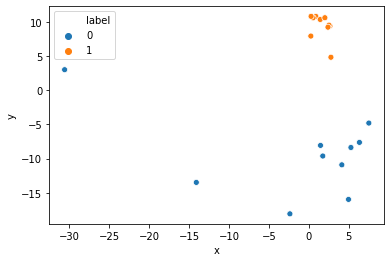

In [32]:
sns.scatterplot(x = to_plot.x, y = to_plot.y, hue=to_plot.label)

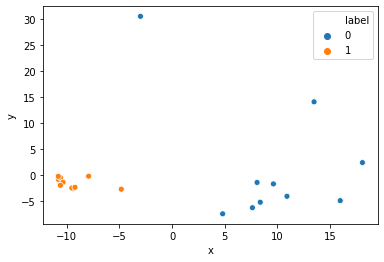

In [33]:
pca = PCA_(standardized_data)
sns.scatterplot(x = pca.x, y = pca.y, hue=pca.label)

------------------------------------------------------------------------------------------------------------------

### T SNE

- Steps of t-SNE algorithm:

    1\ Compute pairwise similarity Pij for every i and j.
    
    2\ Make Pij symmetric.
    
    3\ Choose a random solution Y0
    
    4\ While not done:
          compute pairwise similairites for Yi
          compute the gradient
          update the solution
          if i>max_iter    break
          else
     i = i+1

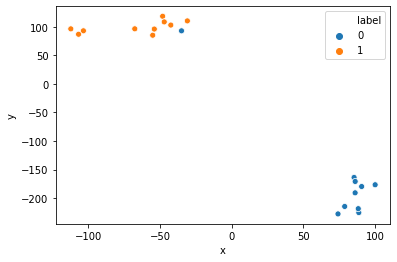

In [34]:
tsne1 = TSNE_(standardized_data, 'pca', 0, 2)
sns.scatterplot(x = tsne1.x, y = tsne1.y, hue=tsne1.label)

- For t-SNE to be meaningful we have to choose right value of perplexity. Perplexity balances the local and global aspects of the dataset. A Very high value will lead to the merging of clusters into a single big cluster and low will produce many close small clusters which will be meaningless.

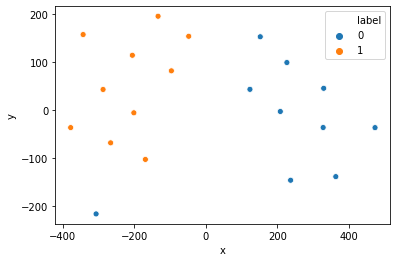

In [35]:
tsne2 = TSNE_(standardized_data, 'pca', 0, 10)
sns.scatterplot(x = tsne2.x, y = tsne2.y, hue=tsne2.label)

------------------------------------------------------------------------------------------------------------------

## Isomap

Isomap is a non-linear dimensionality reduction method based on the spectral theory which tries to preserve the geodesic distances in the lower dimension.

- Isomap starts by creating a neighborhood network. After that, it uses graph distance to the approximate geodesic distance between all pairs of points. And then, through eigenvalue decomposition of the geodesic distance matrix, it finds the low dimensional embedding of the dataset.

Reference: https://blog.paperspace.com/dimension-reduction-with-isomap/

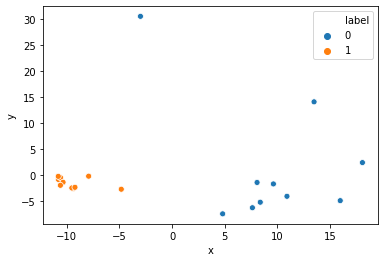

In [36]:
isomap = ISOMAP_(standardized_data, 19)
sns.scatterplot(x = isomap.x, y = isomap.y, hue=isomap.label)

------------------------------------------------------------------------------------------------------------------
## Spectral Embedding

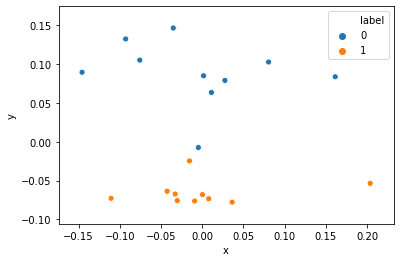

In [37]:
spectral_embedding = SPECTRAL_EMBEDDING_(standardized_data, 'rbf', 0, 'lobpcg')
sns.scatterplot(x = spectral_embedding.x, y = spectral_embedding.y, hue = spectral_embedding.label)

------------------------------------------------------------------------------------------------------------------
## Locally Linear Embedding

Locally linear embedding (LLE): an unsupervised learning algorithm that computes low dimensional, neighborhood
preserving embeddings of high dimensional data. LLE attempts to discover nonlinear structure in high dimensional data by exploiting the local symmetries of linear reconstructions.

Reference: https://cs.nyu.edu/~roweis/lle/papers/lleintro.pdf

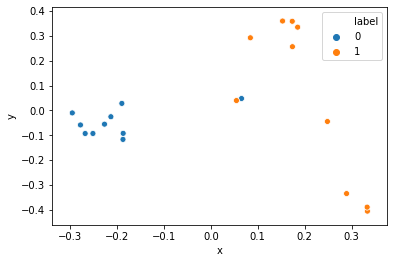

In [38]:
lle = LOCAL_EMBEDDING(standardized_data, 19)
sns.scatterplot(x = lle.x, y = lle.y, hue = lle.label)

------------------------------------------------------------------------------------------------------------------
## Local Tangent Space Alignement 

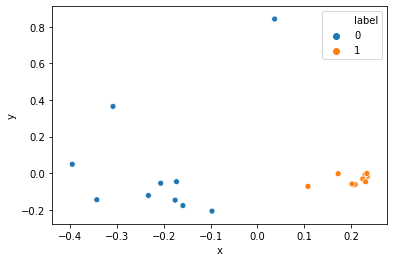

In [39]:
ltsa = LOCAL_EMBEDDING(standardized_data, 19, method='ltsa')
sns.scatterplot(x = ltsa.x, y = ltsa.y, hue=ltsa.label)

------------------------------------------------------------------------------------------------------------------
## Compactness:

Compactness is a feature descriptor which uses two properties of a region: Perimeter of a region defined as the length of its boundary, and area of the region as the number pixels in the region.

In [40]:
def area(img):
    area = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x, y]:
                area += 1
    return area

In [41]:
def compactness(img, contour):
    return (area(img) / len(contour))

In [42]:
compact_zero = []
compact_one = []

area_zero = []
area_one = []

zeros_perimeter = []
ones_perimeter = []

for i in range(len(zeros_im)):
    area_zero.append(area(morph_zeros[i]))
    compact = compactness(morph_zeros[i], zero_contours[i])
    compact_zero.append(compact)

for i in range(len(ones_im)):
    area_one.append(area(morph_ones[i]))
    compact = compactness(morph_ones[i], one_contours[i])
    compact_one.append(compact)
    
for i in range(len(one_contours)):
    zeros_perimeter.append(len(zero_contours[i]))
    ones_perimeter.append(len(one_contours[i]))

#print("Perimeter for zero images: \n", zeros_perimeter)
#print("Perimeter for one images: \n", ones_perimeter)

In [44]:
print("Compactness for zero images: \n", compact_zero)
print("Compactness for one images: \n", compact_one)

Compactness for zero images: 
 [2.75, 2.6041666666666665, 2.7708333333333335, 3.088888888888889, 3.0, 3.0535714285714284, 3.207547169811321, 3.62, 1.8363636363636364, 3.230769230769231]
Compactness for one images: 
 [1.5714285714285714, 1.558139534883721, 1.125, 1.025, 1.5609756097560976, 1.162162162162162, 1.4390243902439024, 1.6046511627906976, 1.3428571428571427, 1.5357142857142858]


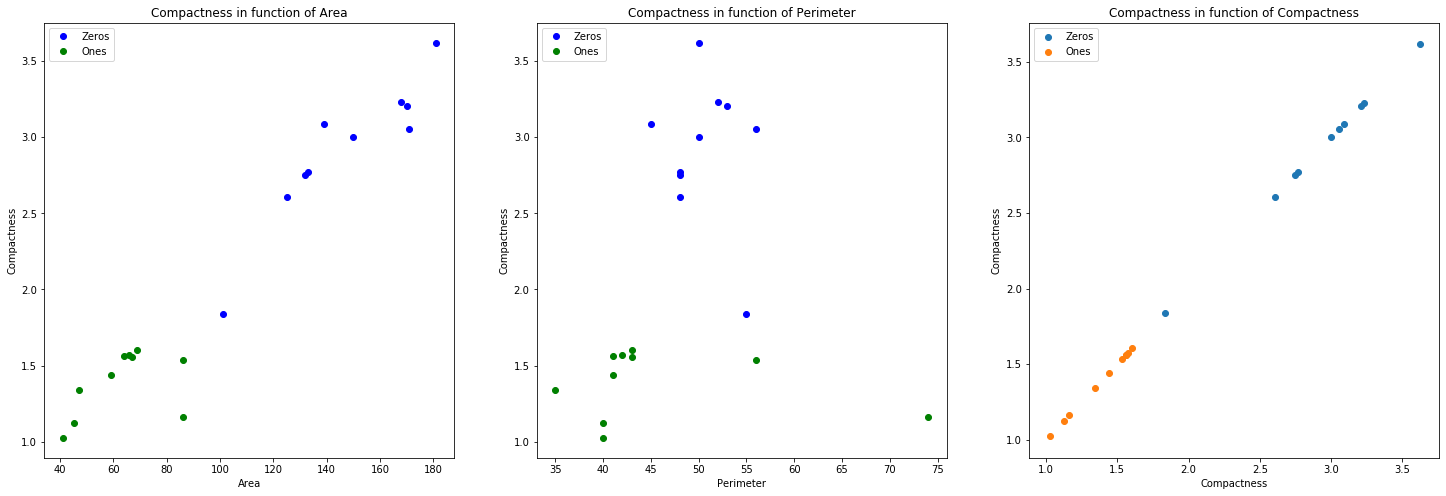

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(25, 8))

ax[0].plot(area_zero, compact_zero, 'bo', label="Zeros")   #Blue for zeros
ax[0].plot(area_one, compact_one, 'go', label="Ones")    #Green for ones
ax[0].set_xlabel("Area")
ax[0].set_ylabel("Compactness")
ax[0].set_title("Compactness in function of Area")
ax[0].legend(loc='upper left', frameon=True)

ax[1].plot(zeros_perimeter, compact_zero, 'bo', label="Zeros")   #Blue for zeros
ax[1].plot(ones_perimeter, compact_one, 'go', label="Ones")    #Green for ones
ax[1].set_xlabel("Perimeter")
ax[1].set_ylabel("Compactness")
ax[1].set_title("Compactness in function of Perimeter")
ax[1].legend(loc='upper left', frameon=True)

ax[2].scatter(compact_zero, compact_zero, label = "Zeros")
ax[2].scatter(compact_one, compact_one, label = "Ones")
ax[2].set_xlabel("Compactness")
ax[2].set_ylabel("Compactness")
ax[2].set_title("Compactness in function of Compactness")
ax[2].legend()
plt.show()

**Comments:** 
- Compactness depends only on the Area and the Perimeter, which are invariant to rotation and translation. 
- As illustrated in the left figure above, we can clearly see that we can do boundary decision (Linear model) to classify the ones and zeros while taking X-axis as area and Y-axis as the compactness although there is an outlier in the images of zeros.
- Taking compactness as the only parameter for description is not sufficient because as illustrated in the right figure above the zeros are widely spread in the scatter plot and there is an outlier as well.

------------------------------------------------------------------------------------------------------------------
## Clustering: KMeans

**Clustering**: (or cluster analysis) is a technique that allows us to find groups of similar objects, objects that are more related to each other than to objects in other groups. Examples of business-oriented applications of clustering include the grouping of documents, music, and movies.

K-Means Clustering algorithm can be broken down into the following four steps:
- Randomly pick k centroids from the sample points as initial cluster centers.
- Assign each sample to the nearest centroid μ^(j), j ∈ {1, …, k}.
- Move the centroids to the center of the samples that were assigned to it.
- Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.

Here clustering is performed as a function of the pairs (area, compactness) and (perimeter, compactness)

In [46]:
def Create_Clusters(ones, ones_descriptor, zeros, zeros_descriptor):
    ones_cluster = np.ndarray(shape = (len(ones), 2), dtype=float)
    zeros_cluster = np.ndarray(shape = (len(zeros), 2), dtype=float)
    
    ones_cluster[:, 0], ones_cluster[:, 1] = np.asarray(ones_descriptor).T, np.asarray(ones).T
    zeros_cluster[:, 0], zeros_cluster[:, 1] = np.asarray(zeros_descriptor).T, np.asarray(zeros).T
    
    return np.concatenate((ones_cluster, zeros_cluster))

In [47]:
from sklearn.cluster import KMeans

km1 = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km2 = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

In [48]:
X1 = Create_Clusters(area_one, compact_one, area_zero, compact_zero)
y_km1 = km1.fit_predict(X1)

X2 = Create_Clusters(ones_perimeter, compact_one, zeros_perimeter, compact_zero)
y_km2 = km2.fit_predict(X2)

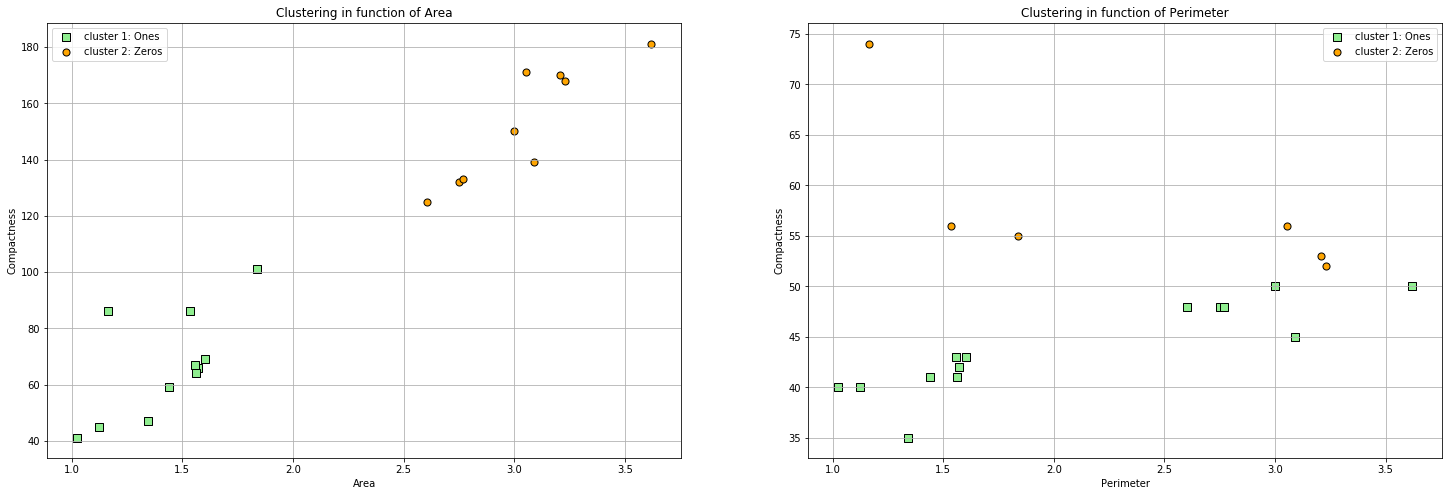

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(25, 8))

ax[0].scatter(
    X1[y_km1 == 0, 0], X1[y_km1 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1: Ones'
)

ax[0].scatter(
    X1[y_km1 == 1, 0], X1[y_km1 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2: Zeros'
)

ax[0].set_xlabel("Area")
ax[0].set_ylabel("Compactness")
ax[0].set_title("Clustering in function of Area")
ax[0].legend(scatterpoints=1)
ax[0].grid()

ax[1].scatter(
    X2[y_km2 == 0, 0], X2[y_km2 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1: Ones'
)

ax[1].scatter(
    X2[y_km2 == 1, 0], X2[y_km2 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2: Zeros'
)

ax[1].set_xlabel("Perimeter")
ax[1].set_ylabel("Compactness")
ax[1].set_title("Clustering in function of Perimeter")

ax[1].legend(scatterpoints=1)
ax[1].grid()

plt.show()

**Comment:**

- When using clustering we can see that we do have on "zero" image (outlier) is miss-classified due to that it is really far from the centriod of zeros cluster.

------------------------------------------------------------------------------------------------------------------
# Chamfer Distance: 
The Chamfer Matching Algorithm calculates the distance (dis-similarity) between two images. The basic idea is to:
    - Extract the edge/contours of a query image as well as target image.
    - Take one point/pixel of contour in query image and find the distance of the closest point/pixel of contour in the target image.
    - Sum the distances for all edge points/pixels of query image.

**Comment:**
- It is hard to find the right template to create the distance map for digit 0, and 1. We will be using image zeros_im[5] as a template for zeros, zeros_im[6] as a template for one.

In [50]:
#template for zeros
image_zeros = (zeros_im[5])
image=np.ones((image_zeros.shape[0],image_zeros.shape[1]))
contours, hierarchy = cv2.findContours(image_zeros, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
skeleton_zero = cv2.drawContours(image, contours, -1, (255,255,255), 1)
skeleton_zero = np.where(skeleton_zero==255,0,1)
skeleton_zero = np.pad(skeleton_zero, (15, 15), 'edge')
distance_map_zeros = scipy.ndimage.morphology.distance_transform_cdt(skeleton_zero)

#template for ones
image_ones = (ones_im[6])
image = np.ones((image_ones.shape[0],image_ones.shape[1]))
contours, hierarchy = cv2.findContours(image_ones, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
skeleton_one = cv2.drawContours(image, contours, -1, (255,255,255), 1)
#plt.imshow(skeleton,cmap='gray')

skeleton_one =np.where(skeleton_one==255,0,1)
skeleton_one =np.pad(skeleton_one, (15, 15), 'edge')# adding padding to prevent the problme of rotation
distance_map_ones=scipy.ndimage.morphology.distance_transform_cdt(skeleton_one)

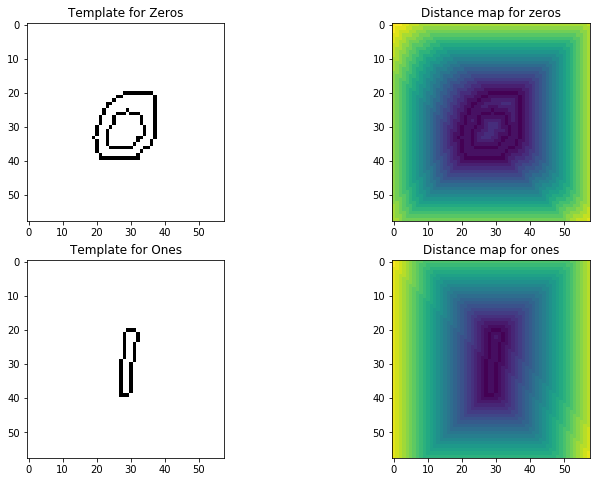

In [51]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0][0].imshow(skeleton_zero, cmap='gray')
ax[0][0].set_title('Template for Zeros')
ax[0][1].imshow(distance_map_zeros)
ax[0][1].set_title('Distance map for zeros')

#plt.imshow(skeleton,cmap='gray')
ax[1][0].imshow(skeleton_one, cmap='gray')
ax[1][0].set_title('Template for Ones')
                   
ax[1][1].imshow(distance_map_ones)
ax[1][1].set_title('Distance map for ones')

plt.show()

In [52]:
def similarity(img1, img2, previous_distance, angle, i, j):
    " Function to calculate the similarity between two image pixel by pixel "
    distance = np.sum(img1*img2)
    if distance < previous_distance:
           return distance, angle, i, j
    else: 
          return None

In [55]:
def features_calculation(distance_map_zeros, d_x, d_y, skeleton, m):    
    "Functio to calculate the optimal transformation for the input image in order to get the minimum distance"
    previous_distance = np.sum(distance_map_zeros.ravel()) #max possible value
    #Translation
    for i in range(0, distance_map_zeros.shape[0]- d_x):
        for j in range(0,distance_map_zeros.shape[1]- d_y):
            for angle in np.arange(0,360,10):
                img_rot = skimage.transform.rotate((skeleton.astype('float')), angle, resize=True)
                img_rot = np.where(img_rot>=np.mean(img_rot), 1, 0)
                
                if (img_rot.shape> skeleton.shape)& ((i+img_rot.shape[0]<=distance_map_zeros.shape[0]) &( j+img_rot.shape[1]<=distance_map_zeros.shape[1])) :
                    if similarity(img_rot,distance_map_zeros[i:i+img_rot.shape[0],j:j+img_rot.shape[1]], previous_distance,angle,i,j)!=None :
                        min_dis, min_angle, min_transl_x, min_transl_y= similarity(img_rot, distance_map_zeros[i:i+img_rot.shape[0],j:j+img_rot.shape[1]],previous_distance, angle, i, j)
                        previous_distance = min_dis
                        
                elif (img_rot.shape== skeleton.shape):
                    if (similarity(img_rot, distance_map_zeros[i:i + d_x, j:j + d_y], previous_distance, angle, i, j) != None): 
                        min_dis, min_angle, min_transl_x, min_transl_y = similarity(img_rot, distance_map_zeros[i:i + d_x,j:j + d_y],previous_distance, angle, i, j)
                        previous_distance = min_dis
            
    print('Image: {}, Minimum distance:{}, Rotation Angle:{}, Translation:[{},{}]'.format(m, previous_distance, min_angle, min_transl_x, min_transl_y ))            
    return min_dis

In [56]:
import pandas as pd
from sklearn.decomposition import PCA
from skimage.morphology import skeletonize
from skimage.util import invert
from skimage.measure import regionprops
from tqdm import tqdm

#  Load ones/Zeros
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_imm = skimage.io.concatenate_images(ic)
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_imm = skimage.io.concatenate_images(ic)

features = pd.DataFrame(index=np.arange(0,len(zeros_imm)+len(ones_imm)), columns=['Features0','Features1'])

print("\t------ Zero Images --------")
image = np.ones((image_zeros.shape[0], image_zeros.shape[1]))

for m in range(len(zeros_imm)):
    contours, hierarchy = cv2.findContours(zeros_imm[m,:,:], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    skeleton = cv2.drawContours(image-1, contours, -1, (255,255,255), 1)
    skeleton = np.where(skeleton==255,1,0)
    for region in regionprops(skeleton):
        minr, minc, maxr, maxc = region.bbox
    d_x = np.abs(minr - maxr)
    d_y = np.abs(minc - maxc)
    
    min_dis = features_calculation(distance_map_zeros, d_x, d_y, skeleton[minr:maxr,minc:maxc],m)
    features.iloc[m,0] = min_dis
    min_dis = features_calculation(distance_map_ones, d_x, d_y, skeleton[minr:maxr,minc:maxc],m)
    features.iloc[m,1] = min_dis
    
    image = np.ones((image_zeros.shape[0], image_zeros.shape[1]))
    
print("\t------ One Images --------")
image=np.ones((image_zeros.shape[0],image_zeros.shape[1]))

for n in range(len(ones_im)):
    contours, hierarchy = cv2.findContours(ones_imm[n,:,:], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    skeleton=cv2.drawContours(image-1, contours, -1, (255,255,255), 1)
    skeleton=np.where(skeleton==255,1,0)
    for region in regionprops(skeleton):
        minr, minc, maxr, maxc = region.bbox
    d_x = np.abs(minr - maxr)
    d_y = np.abs(minc - maxc)
    
    min_dis = features_calculation(distance_map_zeros, d_x, d_y, skeleton[minr:maxr,minc:maxc],n)
    features.iloc[m+n+1,0] = min_dis
    min_dis = features_calculation(distance_map_ones, d_x, d_y, skeleton[minr:maxr,minc:maxc],n)
    features.iloc[m+n+1,1] = min_dis
    image=np.ones((image_zeros.shape[0],image_zeros.shape[1]))

	------ Zero Images --------
Image: 0, Minimum distance:45, Rotation Angle:0, Translation:[20,22]
Image: 0, Minimum distance:188, Rotation Angle:180, Translation:[20,22]
Image: 1, Minimum distance:60, Rotation Angle:0, Translation:[20,20]
Image: 1, Minimum distance:250, Rotation Angle:180, Translation:[20,21]
Image: 2, Minimum distance:52, Rotation Angle:0, Translation:[20,20]
Image: 2, Minimum distance:262, Rotation Angle:180, Translation:[20,22]
Image: 3, Minimum distance:61, Rotation Angle:180, Translation:[20,20]
Image: 3, Minimum distance:144, Rotation Angle:180, Translation:[20,23]
Image: 4, Minimum distance:56, Rotation Angle:180, Translation:[20,22]
Image: 4, Minimum distance:161, Rotation Angle:180, Translation:[20,21]
Image: 5, Minimum distance:0, Rotation Angle:0, Translation:[20,19]
Image: 5, Minimum distance:302, Rotation Angle:180, Translation:[20,21]
Image: 6, Minimum distance:66, Rotation Angle:0, Translation:[20,20]
Image: 6, Minimum distance:301, Rotation Angle:180, T

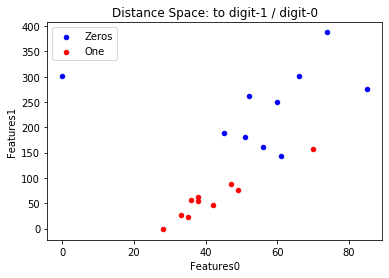

In [58]:
#Features: Feature 0: distance to zero template /  Feature 1: distance to one template
ax = features.iloc[0:len(zeros_im),:].plot.scatter(x = 'Features0', y = 'Features1',c = 'Blue', label="Zeros")
features.iloc[len(zeros_im)::,:].plot.scatter(x = 'Features0', y = 'Features1',c = 'Red', ax = ax, label="One")
plt.title('Distance Space: to digit-1 / digit-0')
plt.show()

**Comment:**
- We can differentiate the 0/1 digits based on Chamfer distance as illustrated in the figure above.
- Chamfer distance is very computationaly expensive.
- Results depend mainly on the skeleton used to create the distance map which may be difficult to choose, as we see in out dataset where the zeros are very diverse. Also, we need to apply the translation operation to find the minimum distance.


------------------------------------------------------------------------------------------------------------------
# Elongation: 
Elongation is the ratio between the length and width of the object bounding box, Can also be defined as the square root of the ratio of the eigenvalues of the matrix of inertia

In [152]:
def Elongation(image):
    image = scipy.ndimage.grey_opening(image, size = (2,2))
    ret,thresh1 = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
    m = cv2.moments(thresh1)
    x = m['mu20'] + m['mu02']
    y = 4 * m['mu11']**2 + (m['mu20'] - m['mu02'])**2
    return (x + y**0.5) / (x - y**0.5)

In [243]:
zeros_elong = []
ones_elong = []

for img in zeros_imm:
    elong = Elongation(img)
    zeros_elong.append(elong)

for img in ones_imm:
    elong = Elongation(img)
    ones_elong.append(elong)

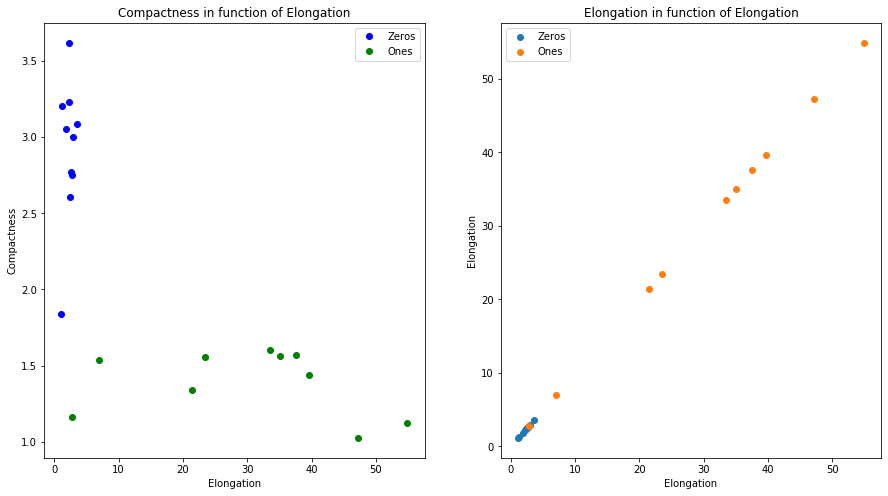

In [244]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].plot(zeros_elong, compact_zero, 'bo', label="Zeros")   #Blue for zeros
ax[0].plot(ones_elong, compact_one, 'go', label="Ones")    #Green for ones
ax[0].set_xlabel("Elongation")
ax[0].set_ylabel("Compactness")
ax[0].set_title("Compactness vs Elongation")
ax[0].legend(loc='upper right', frameon=True)

ax[1].scatter(zeros_elong, zeros_elong, label = "Zeros")
ax[1].scatter(ones_elong, ones_elong, label = "Ones")
ax[1].set_xlabel("Elongation")
ax[1].set_ylabel("Elongation")
ax[1].set_title("Only Elongation")
ax[1].legend()
plt.show()

**Comments:**

The results for the combination of compactness and elongation appear linearly seperable, but this is not the case for elongation on its own.

------------------------------------------------------------------------------------------------------------------
## Part 2

### 2.1 Data visualization

In [206]:
#  Load zeros
twos_path = os.path.join(data_base_path, data_folder, 'part2', '2')
twos_names = [nm for nm in os.listdir(twos_path) if '.png' in nm]  # make sure to only load .png
twos_names.sort()  # sort file names
twos_im = []
for im_name in twos_names:
    twos_im.append(skimage.io.imread('../data/lab-02-data/part2/2/' + im_name))
ic = skimage.io.imread_collection([os.path.join(twos_path, nm) for nm in twos_names])
twos_imm = skimage.io.concatenate_images(ic)
#  Load ones
threes_path = os.path.join(data_base_path, data_folder, 'part2', '3')
threes_names = [nm for nm in os.listdir(threes_path) if '.png' in nm]  # make sure to only load .png
threes_names.sort()  # sort file names
threes_im = []
for im_name in threes_names:
    threes_im.append(skimage.io.imread('../data/lab-02-data/part2/3/' + im_name))
ic = skimage.io.imread_collection(([os.path.join(threes_path, nm) for nm in threes_names]))
threes_imm = skimage.io.concatenate_images(ic)

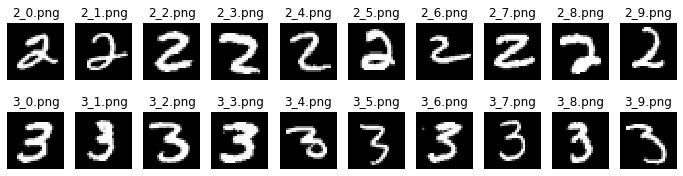

In [166]:
# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

## Fourier Descriptors: 
### Preprocessing:
We carry out the same process as in part 1

In [167]:
morph_twos= []
morph_threes = []
contour_twos = []
contour_threes = []

for image in twos_im:
    binary = binarize_vec(image, 128)
    morph = skimage.morphology.diameter_opening(binary, 5)
    morph_twos.append(morph)
    contour_twos.append( skimage.morphology.binary_erosion(morph) ^ morph )

for image in threes_im:
    binary = binarize_vec(image, 128)
    morph = skimage.morphology.diameter_opening(binary,5)
    morph_threes.append(morph)
    contour_threes.append( skimage.morphology.binary_erosion(morph) ^ morph )

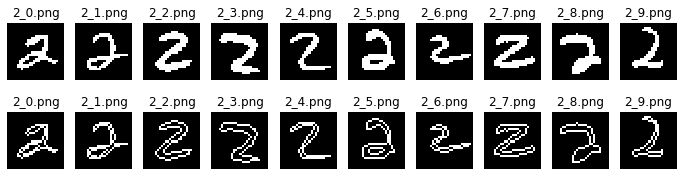

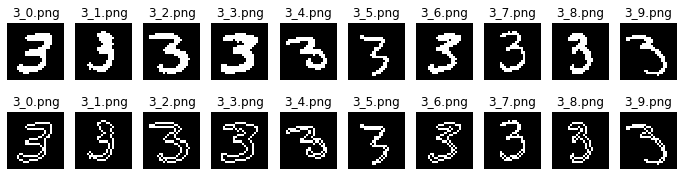

In [168]:
# Plot contours
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], morph_twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], contour_twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))    
for ax, im, nm in zip(axes[0], morph_threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], contour_threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

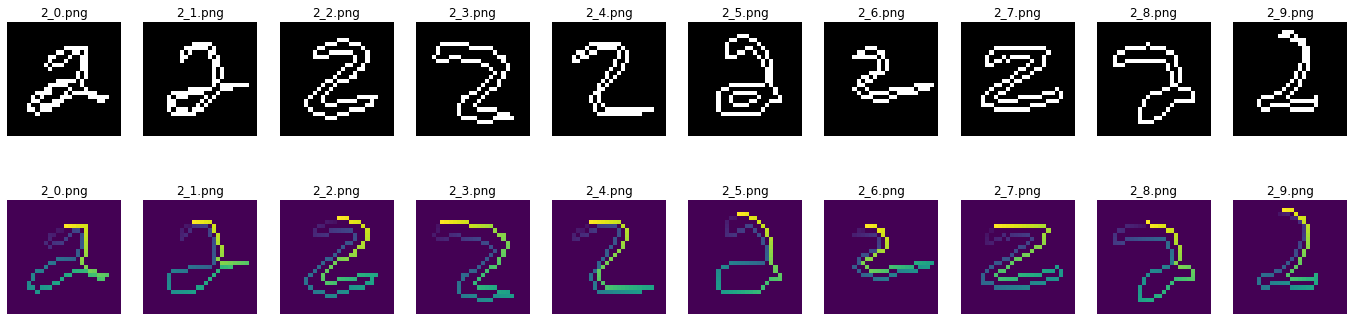

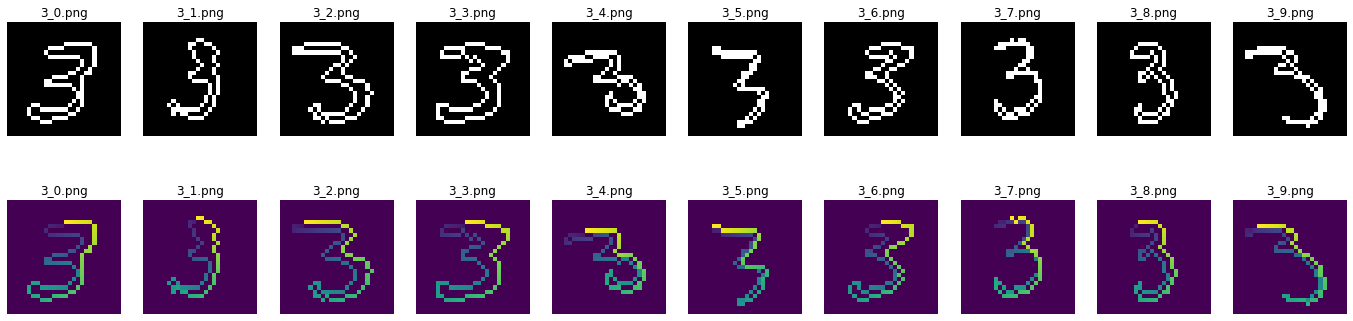

In [169]:
two_contours = get_contours(contour_twos)
three_contours = get_contours(contour_threes)
canvases_twos = []
canvases_threes = []

for contour in two_contours:
    canvas = np.zeros_like(contour_twos[0], dtype=np.uint16)
    for i in range(len(contour)):
        canvas[contour[i]]= 30 + i*10
    canvases_twos.append(canvas)
    
for contour in three_contours:
    canvas = np.zeros_like(contour_threes[0], dtype=np.uint16)
    for i in range(len(contour)):
        canvas[contour[i]]= 50 + i*10
    canvases_threes.append(canvas)
    
fig, axes = plt.subplots(2, len(twos_im), figsize=(24, 6))
for ax, im, nm in zip(axes[0], contour_twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], canvases_twos, twos_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
    
fig, axes = plt.subplots(2, len(threes_im), figsize=(24, 6))
for ax, im, nm in zip(axes[0], contour_threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], canvases_threes, threes_names):
    ax.imshow(im)
    ax.axis('off')

    ax.set_title(nm)

------------------------------------------------------------------------------------------------------------------
## Fourier Descriptors

/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/user/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False

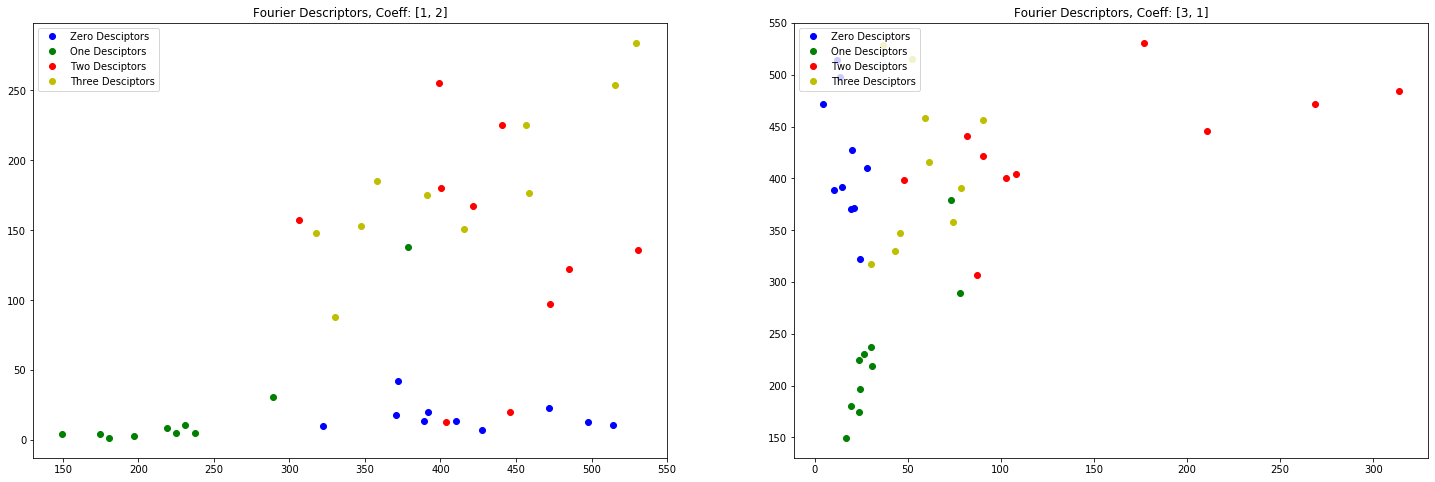

In [171]:
fig, ax = plt.subplots(1, 2, figsize=(25, 8))

descriptors_zero  = fourier_description(zero_contours, [1, 2])
descriptors_one   = fourier_description(one_contours, [1, 2])
descriptors_two  = fourier_description(two_contours, [1, 2])
descriptors_three   = fourier_description(three_contours, [1, 2])

descriptors_zero1 = fourier_description(zero_contours, [3, 1])
descriptors_one1  = fourier_description(one_contours, [3, 1])
descriptors_two1 = fourier_description(two_contours, [3, 1])
descriptors_three1  = fourier_description(three_contours, [3, 1])


ax[0].plot(descriptors_zero[0], descriptors_zero[1],'bo', label="Zero Desciptors")
ax[0].plot(descriptors_one[0], descriptors_one[1], 'go', label="One Desciptors")
ax[0].plot(descriptors_two[0], descriptors_two[1],'ro', label="Two Desciptors")
ax[0].plot(descriptors_three[0], descriptors_three[1], 'yo', label="Three Desciptors")
ax[0].set_title("Fourier Descriptors, Coeff: [1, 2]")
ax[0].legend(loc='upper left', frameon=True)

ax[1].plot(descriptors_zero1[0], descriptors_zero1[1],'bo', label="Zero Desciptors")
ax[1].plot(descriptors_one1[0], descriptors_one1[1], 'go', label="One Desciptors")
ax[1].plot(descriptors_two1[0], descriptors_two1[1],'ro', label="Two Desciptors")
ax[1].plot(descriptors_three1[0], descriptors_three1[1], 'yo', label="Three Desciptors")
ax[1].set_title("Fourier Descriptors, Coeff: [3, 1]")
ax[1].legend(loc='upper left', frameon=True)

plt.show()

**Comment:**
- Using 2D- feature vectors from Fourier descriptors is not sufficient to differentiate the four digits. 

### 2.2 Additional method(s) and conclusion

In [194]:
#Data needs to be standadized for PCA
twos_reshaped = np.array(twos_im).reshape(len(twos_im), -1)
threes_reshaped = np.array(threes_im).reshape(len(threes_im), -1)
data = np.concatenate((zeros_reshaped, ones_reshaped, twos_reshaped, threes_reshaped), axis = 0) 
labels = [0]*len(zeros_im) + [1]*len(ones_im) + [2]*len(twos_im) + [3]*len(threes_im)
standardized_data = StandardScaler().fit_transform(data)
#standardized_data = data
covar_matrix = np.matmul(standardized_data.T , standardized_data)
values, vectors = eigh(covar_matrix, eigvals=(782,783))
projection_coord = np.matmul(vectors.T, standardized_data.T)
to_plot = pd.DataFrame(data= {'x' : projection_coord[0], 'y' : projection_coord[1], 'label':labels})

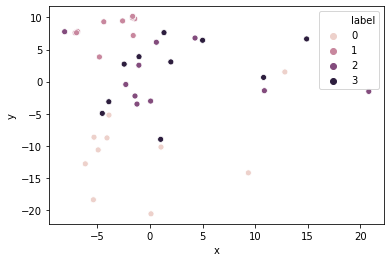

In [195]:
sns.scatterplot(x = to_plot.x, y = to_plot.y, hue=to_plot.label)

------------------------------------------------------------------------------------------------------------------
## PCA

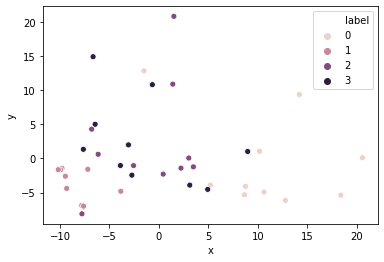

In [196]:
pca = PCA_(standardized_data)
sns.scatterplot(x = pca.x, y = pca.y, hue=pca.label)

------------------------------------------------------------------------------------------------------------------

## TSNE

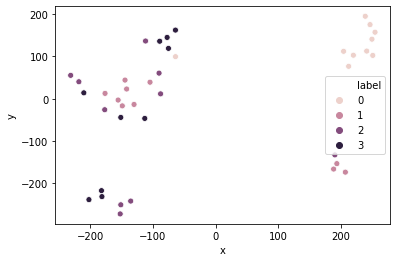

In [197]:
tsne = TSNE_(standardized_data, 'pca', 0, 2)
sns.scatterplot(x = tsne.x, y = tsne.y, hue=tsne.label)

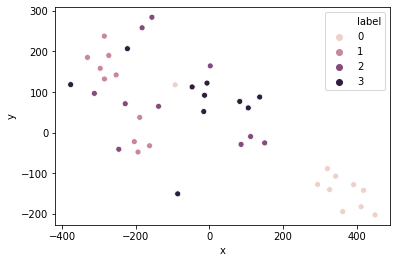

In [198]:
tsne = TSNE_(standardized_data, 'pca', 0, 3.5)
sns.scatterplot(x = tsne.x, y = tsne.y, hue=tsne.label)

------------------------------------------------------------------------------------------------------------------
## Isomap

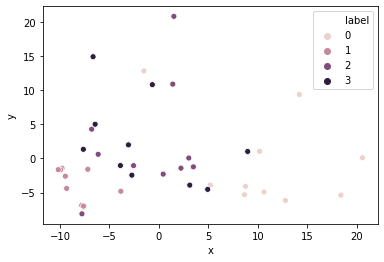

In [199]:
isomap = ISOMAP_(standardized_data, 39)
sns.scatterplot(x = isomap.x, y = isomap.y, hue=isomap.label)

------------------------------------------------------------------------------------------------------------------
## Spectral Embedding

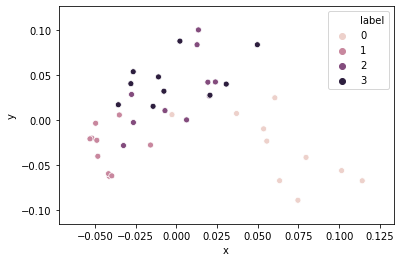

In [200]:
spectral_embedding = SPECTRAL_EMBEDDING_(standardized_data, 'rbf', 0, 'lobpcg')
sns.scatterplot(x = spectral_embedding.x, y = spectral_embedding.y, hue = spectral_embedding.label)

------------------------------------------------------------------------------------------------------------------
## Locally Linear Embedding

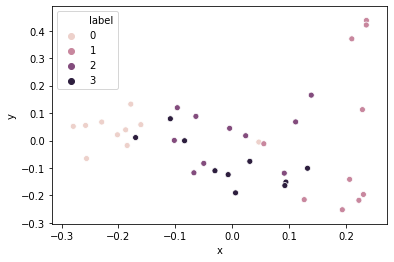

In [201]:
lle = LOCAL_EMBEDDING(standardized_data, 39)
sns.scatterplot(x = lle.x, y = lle.y, hue=lle.label)

------------------------------------------------------------------------------------------------------------------
## Local Tangent Space Alignement

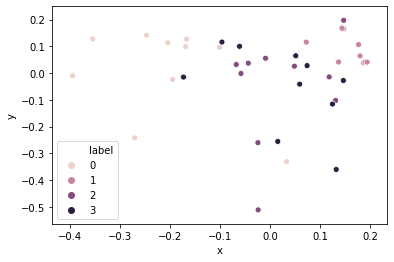

In [202]:
ltsa = LOCAL_EMBEDDING(standardized_data, 39, method='ltsa')
sns.scatterplot(x = ltsa.x, y = ltsa.y, hue=ltsa.label)

------------------------------------------------------------------------------------------------------------------
## Compactness

In [245]:
compact_two = []
compact_three = []

area_two = []
area_three = []

twos_perimeter = []
threes_perimeter = []

for i in range(len(twos_im)):
    area_two.append(area(morph_twos[i]))
    compact = compactness(morph_twos[i], two_contours[i])
    compact_two.append(compact)

for i in range(len(threes_im)):
    area_three.append(area(morph_threes[i]))
    compact = compactness(morph_threes[i], three_contours[i])
    compact_three.append(compact)
    
for i in range(len(two_contours)):
    twos_perimeter.append(len(two_contours[i]))
    threes_perimeter.append(len(three_contours[i]))

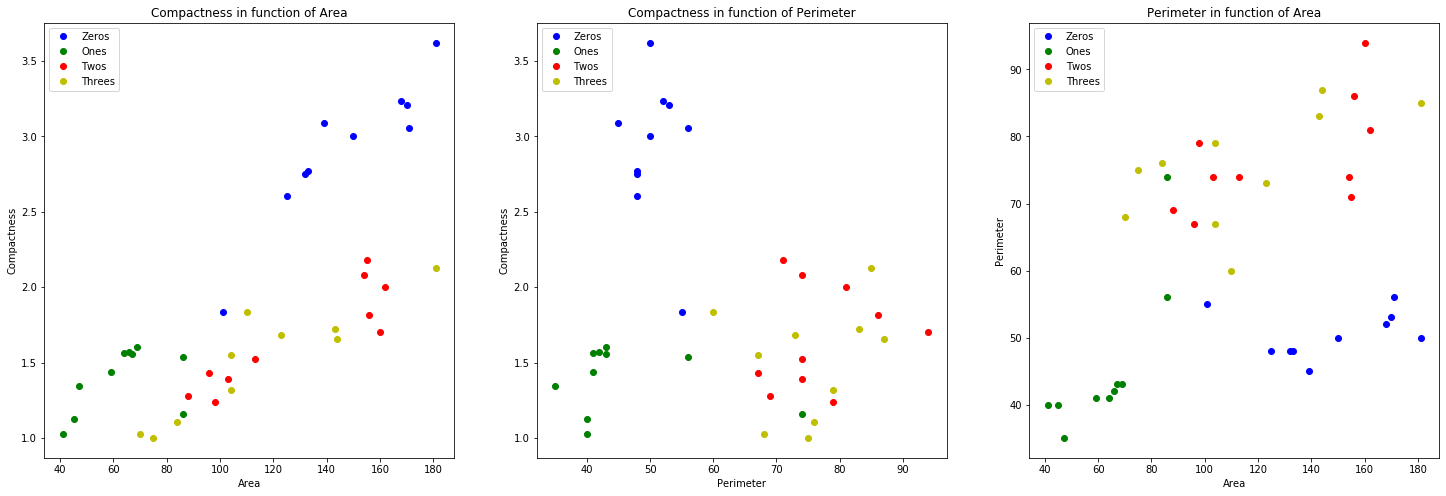

In [246]:
fig, ax = plt.subplots(1, 3, figsize=(25, 8))

ax[0].plot(area_zero, compact_zero, 'bo', label="Zeros")   #Blue for zeros
ax[0].plot(area_one, compact_one, 'go', label="Ones")    #Green for ones
ax[0].plot(area_two, compact_two, 'ro', label="Twos")   #Red for zeros
ax[0].plot(area_three, compact_three, 'yo', label="Threes")    #yellow for ones
ax[0].set_xlabel("Area")
ax[0].set_ylabel("Compactness")
ax[0].set_title("Compactness in function of Area")
ax[0].legend(loc='upper left', frameon=True)

ax[1].plot(zeros_perimeter, compact_zero, 'bo', label="Zeros")   #Blue for zeros
ax[1].plot(ones_perimeter, compact_one, 'go', label="Ones")    #Green for ones
ax[1].plot(twos_perimeter, compact_two, 'ro', label="Twos")   #Red for twos
ax[1].plot(threes_perimeter, compact_three, 'yo', label="Threes")    #yellow for threes
ax[1].set_xlabel("Perimeter")
ax[1].set_ylabel("Compactness")
ax[1].set_title("Compactness in function of Perimeter")
ax[1].legend(loc='upper left', frameon=True)

ax[2].plot(area_zero,  zeros_perimeter, 'bo', label="Zeros")   #Blue for zeros
ax[2].plot(area_one, ones_perimeter,'go', label="Ones")    #Green for ones
ax[2].plot(area_two, twos_perimeter, 'ro', label="Twos")   #Red for twos
ax[2].plot(area_three, threes_perimeter,  'yo', label="Threes")    #yellow for threes
ax[2].set_xlabel("Area")
ax[2].set_ylabel("Perimeter")
ax[2].set_title("Perimeter in function of Area")
ax[2].legend(loc='upper left', frameon=True)

plt.show()

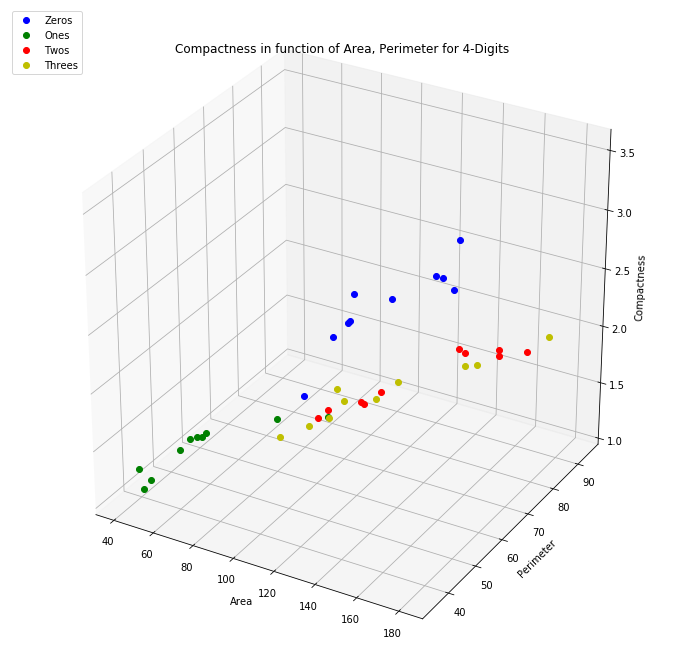

In [247]:
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure(figsize=(12, 12))
ax = fig1.add_subplot(111, projection='3d')   

ax.plot(area_zero, zeros_perimeter, compact_zero, 'bo', label="Zeros")           #Blue for zeros
ax.plot(area_one, ones_perimeter, compact_one, 'go', label="Ones")               #Green for ones
ax.plot(area_two, twos_perimeter, compact_two, 'ro', label="Twos")               #Red for zeros
ax.plot(area_three, threes_perimeter, compact_three, 'yo', label="Threes")       #yellow for ones
ax.set_xlabel("Area")
ax.set_ylabel("Perimeter")
ax.set_zlabel("Compactness")
ax.set_title("Compactness in function of Area, Perimeter for 4-Digits")
ax.legend(loc='upper left', frameon=True)
plt.show()

**Comment:**

- It seems that using 2D Feature vectors to differentiate the 4-numbers is not possible, due to that the perimeter and the area of digit-2 and digit-3 are approximately the same as illustrated in the table above.
- Considering the results from previous methods, we observe that images of digit "0" is quite distinguishable comparing to other digits.

----------------------------------------------------------------------------------------------------------------
## Elongation and Compactness

In [248]:
twos_elong = []
threes_elong = []

for img in twos_imm:
    elong = Elongation(img)
    twos_elong.append(elong)

for img in threes_imm:
    elong = Elongation(img)
    threes_elong.append(elong)

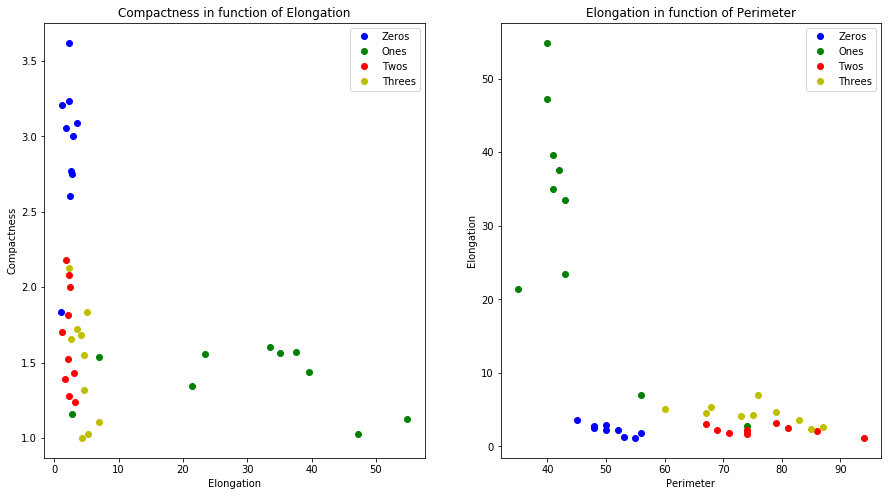

In [249]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].plot(zeros_elong, compact_zero, 'bo', label="Zeros")   #Blue for zeros
ax[0].plot(ones_elong, compact_one, 'go', label="Ones")    #Green for ones
ax[0].plot(twos_elong, compact_two, 'ro', label="Twos")   #Red for zeros
ax[0].plot(threes_elong, compact_three, 'yo', label="Threes")    #Yellow for ones
ax[0].set_xlabel("Elongation")
ax[0].set_ylabel("Compactness")
ax[0].set_title("Compactness in function of Elongation")
ax[0].legend(loc='upper right', frameon=True)

ax[1].plot(zeros_perimeter, zeros_elong, 'bo', label="Zeros")   #Blue for zeros
ax[1].plot(ones_perimeter, ones_elong, 'go', label="Ones")    #Green for ones
ax[1].plot(twos_perimeter, twos_elong, 'ro', label="Twos")   #Red for zeros
ax[1].plot(threes_perimeter, threes_elong, 'yo', label="Threes")    #Yellow for ones
ax[1].set_xlabel("Perimeter")
ax[1].set_ylabel("Elongation")
ax[1].set_title("Elongation in function of Perimeter")
ax[1].legend()
plt.show()

In [253]:
import pandas as pd

features = {'A_0': area_zero,
            'A_1': area_one,
            'A_2': area_two,
            'A_3': area_three,
            'P_0': zeros_perimeter,
            'P_1': ones_perimeter,
            'P_2': twos_perimeter,
            'P_3': threes_perimeter,
            'C_0': compact_zero,
            'C_1': compact_one,
            'C_2': compact_two,
            'C_3': compact_three,
            'E_0': zeros_elong,
            'E_1': ones_elong,
            'E_2': twos_elong,
            'E_3': threes_elong,
        }

#df = pd.DataFrame(features, columns = ['A_0', 'A_1', 'A_2', 'A_3','P_0', 'P_1','P_2','P_3', 'E_0', 'E_1','E_2','E_3'])
df = pd.DataFrame(features, columns = ['A_2', 'A_3','P_2','P_3','E_2','E_3'])

In [254]:
#[A:Area, P: Perimeter, C:Compactness, E: Elongation] 
print(df)

   A_2  A_3  P_2  P_3       E_2       E_3
0  113  143   74   83  2.122847  3.549517
1  103  110   74   60  1.711154  5.020773
2  156  144   86   87  2.109565  2.625962
3  162  181   81   85  2.449013  2.335022
4   98  104   79   79  3.153767  4.633018
5  155   70   71   68  1.862732  5.282596
6   88  123   69   73  2.284870  4.104073
7  160   75   94   75  1.137254  4.312915
8  154  104   74   67  2.232495  4.595981
9   96   84   67   76  3.022751  7.003910


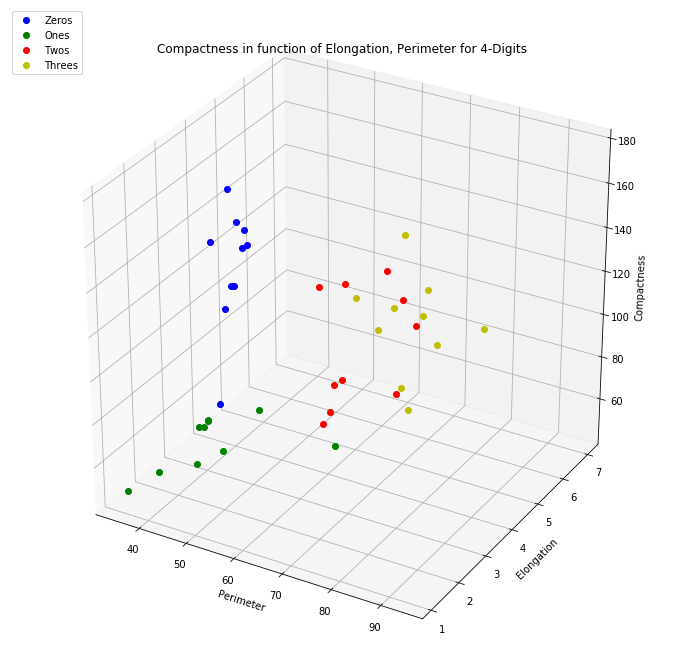

In [237]:
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure(figsize=(12, 12))
ax = fig1.add_subplot(111, projection='3d')   

ax.plot(zeros_perimeter, zeros_elong, area_zero, 'bo', label="Zeros")           #Blue for zeros
ax.plot(ones_perimeter, zeros_elong, area_one, 'go', label="Ones")               #Green for ones
ax.plot(twos_perimeter, twos_elong, area_two, 'ro', label="Twos")               #Red for zeros
ax.plot(threes_perimeter, threes_elong, area_three, 'yo', label="Threes")       #yellow for ones
ax.set_xlabel("Perimeter")
ax.set_ylabel("Elongation")
ax.set_zlabel("Compactness")
ax.set_title("Compactness in function of Elongation, Perimeter for 4-Digits")
ax.legend(loc='upper left', frameon=True)
plt.show()

**Comment:**
- We can see that using just compactness and elongation, it is quite difficult to differentiate between twos and threes as their shapes have similar properites.
- We tried different functions of mapping in 3D feature space (by interchanging elongation, perimeter and compactness), but it was not succesfful because the values are very close to each other which makes it very difficult to discriminite between digits.

----------------------------------------------------------------------------------------------------------------
## Chamfer Distance

In [268]:
# Template for twos
image_twos = (twos_im[4])
image=np.ones((image_twos.shape[0],image_twos.shape[1]))
contours, hierarchy = cv2.findContours(image_twos, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
skeleton_two = cv2.drawContours(image, contours, -1, (255,255,255), 1)
skeleton_two = np.where(skeleton_two==255,0,1)
skeleton_two = np.pad(skeleton_two, (15, 15), 'edge')
distance_map_twos = scipy.ndimage.morphology.distance_transform_cdt(skeleton_two)

# Template for threes
image_threes = (threes_im[3])
image = np.ones((image_threes.shape[0],image_threes.shape[1]))
contours, hierarchy = cv2.findContours(image_threes, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
skeleton_three = cv2.drawContours(image, contours, -1, (255,255,255), 1)

skeleton_three =np.where(skeleton_three == 255,0,1)
skeleton_three =np.pad(skeleton_three, (15, 15), 'edge')# adding padding to prevent the problme of rotation
distance_map_threes=scipy.ndimage.morphology.distance_transform_cdt(skeleton_three)

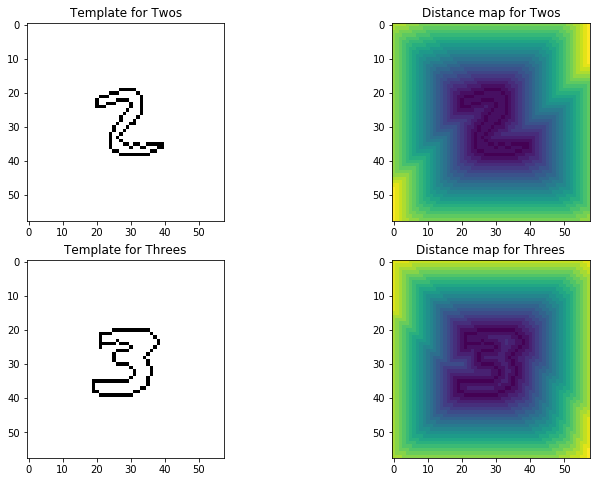

In [269]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0][0].imshow(skeleton_two, cmap='gray')
ax[0][0].set_title('Template for Twos')
ax[0][1].imshow(distance_map_twos)
ax[0][1].set_title('Distance map for Twos')

#plt.imshow(skeleton,cmap='gray')
ax[1][0].imshow(skeleton_three, cmap='gray')
ax[1][0].set_title('Template for Threes')
                   
ax[1][1].imshow(distance_map_threes)
ax[1][1].set_title('Distance map for Threes')

plt.show()

In [270]:
features2 = pd.DataFrame(index=np.arange(0,len(twos_imm)+len(threes_imm)), columns=['Features2','Features3'])
image = np.ones((image_twos.shape[0], image_twos.shape[1]))

print("------------------------- Two Images ----------------------------------")
for m in range(len(twos_imm)):
    contours, hierarchy = cv2.findContours(twos_imm[m,:,:], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    skeleton=cv2.drawContours(image-1, contours, -1, (255,255,255), 1)
    skeleton=np.where(skeleton==255,1,0)

    for region in regionprops(skeleton):
        minr, minc, maxr, maxc = region.bbox
    d_x = np.abs(minr - maxr)
    d_y = np.abs(minc - maxc)
    
    min_dis = features_calculation(distance_map_twos, d_x, d_y, skeleton[minr:maxr, minc:maxc],m)
    features2.iloc[m,0] = min_dis
    min_dis = features_calculation(distance_map_threes, d_x, d_y, skeleton[minr:maxr, minc:maxc],m)
    features2.iloc[m,1] = min_dis
    
    image = np.ones((image_twos.shape[0], image_twos.shape[1]))

print("----------------------------------------------------------------------")
print("---------------------- Three Images ----------------------------------")
image = np.ones((image_threes.shape[0],image_threes.shape[1]))

for n in range(len(threes_im)):
    contours, hierarchy = cv2.findContours(threes_imm[n,:,:], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    skeleton = cv2.drawContours(image-1, contours, -1, (255,255,255), 1)
    skeleton = np.where(skeleton==255,1,0)
    
    for region in regionprops(skeleton):
        minr, minc, maxr, maxc = region.bbox
    d_x = np.abs(minr-maxr)
    d_y = np.abs(minc-maxc)
    
    min_dis = features_calculation(distance_map_twos, d_x, d_y, skeleton[minr:maxr,minc:maxc], n)
    features2.iloc[m+n+1,0] = min_dis
    min_dis = features_calculation(distance_map_threes, d_x, d_y, skeleton[minr:maxr,minc:maxc], n)
    features2.iloc[m+n+1,1] = min_dis
    image = np.ones((image_threes.shape[0], image_threes.shape[1]))

	-------------------- Two Images ----------------------------------
Image: 0, Minimum distance:97, Angle:90, Translation:[17,19]
Image: 0, Minimum distance:87, Angle:180, Translation:[22,21]
Image: 1, Minimum distance:109, Angle:180, Translation:[19,16]
Image: 1, Minimum distance:88, Angle:0, Translation:[22,17]
Image: 2, Minimum distance:108, Angle:180, Translation:[19,19]
Image: 2, Minimum distance:71, Angle:0, Translation:[20,18]
Image: 3, Minimum distance:75, Angle:180, Translation:[20,22]
Image: 3, Minimum distance:87, Angle:0, Translation:[20,19]
Image: 4, Minimum distance:0, Angle:0, Translation:[19,20]
Image: 4, Minimum distance:74, Angle:0, Translation:[20,18]
Image: 5, Minimum distance:95, Angle:180, Translation:[19,20]
Image: 5, Minimum distance:70, Angle:0, Translation:[20,19]
Image: 6, Minimum distance:69, Angle:270, Translation:[20,22]
Image: 6, Minimum distance:64, Angle:270, Translation:[20,25]
Image: 7, Minimum distance:123, Angle:0, Translation:[22,20]
Image: 7, Minim

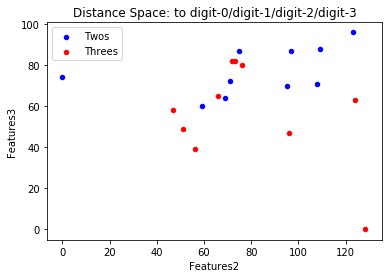

In [273]:
#Features: Feature0 distance to zero/Feature1: distance to one/Feature2 distance to two/ Feature3: distance to three
ax = features2.iloc[0:len(twos_imm),:].plot.scatter(x = 'Features2', y = 'Features3',c = 'Blue', label="Twos")
features2.iloc[len(twos_imm)::,:].plot.scatter(x = 'Features2', y = 'Features3',c = 'Red', ax = ax, label="Threes")
plt.title('Distance Space: to digit-0/digit-1/digit-2/digit-3')
plt.show()

**Comment:**
- Even with Chamfer distance if is not possible to differentiate the twos and threes digits.